In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

In [2]:
# --- 0. 設定路徑 ---
# 因為 notebook 在 notebooks/ 資料夾中，所以根目錄是上一層
PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / 'data'
RAW_DATA_DIR = DATA_DIR / 'raw'
REPORTS_DIR = PROJECT_ROOT / 'reports'
FIGURES_DIR = REPORTS_DIR / 'figures'

missing_ratio_threshold = 0.1  # 可自行調整，顯示遺失值比例高於此值的欄位

## 讀取資料與欄位描述

In [3]:
# 讀取資料
train_path = RAW_DATA_DIR / 'train.csv'
train = pd.read_csv(train_path)

# 讀取欄位描述
description_path = RAW_DATA_DIR / 'data_description.txt'
with open(description_path, encoding='utf-8') as f:
    description = f.read()
print('Data loaded successfully.')

Data loaded successfully.


## 資料集基本資訊與缺失值分析

In [4]:
print('===== 資料集基本資訊 =====')
train.info()

===== 資料集基本資訊 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

In [6]:
print('===== 缺失值統計 =====')
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

# 顯示遺失值比例高於 missing_ratio_threshold 的欄位
print(f'===== 遺失值比例高於 {missing_ratio_threshold:.0%} 的欄位 =====')
missing_ratio = train.isnull().mean()
high_missing = missing_ratio[missing_ratio > missing_ratio_threshold]
if not high_missing.empty:
    print(high_missing.sort_values(ascending=False))
else:
    print('無遺失值比例高於指定門檻的欄位')

===== 缺失值統計 =====
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64
===== 遺失值比例高於 10% 的欄位 =====
PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
FireplaceQu    0.472603
LotFrontage    0.177397
dtype: float64


## 數值與類別欄位分析

In [7]:
print('===== 數值型欄位描述 =====')
display(train.describe().T)

print('===== 類別型欄位分布 =====')
cat_cols = train.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f'-- {col} --')
    print(train[col].value_counts(dropna=False))

===== 數值型欄位描述 =====


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


===== 類別型欄位分布 =====
-- MSZoning --
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
-- Street --
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
-- Alley --
Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64
-- LotShape --
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
-- LandContour --
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
-- Utilities --
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
-- LotConfig --
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
-- LandSlope --
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
-- Neighborhood --
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     5

## 視覺化分析

===== 類別型特徵與房價的箱型圖 =====
圖表將儲存至: /Users/jim/Documents/home-data-for-ml-course/reports/figures/cat_boxplots


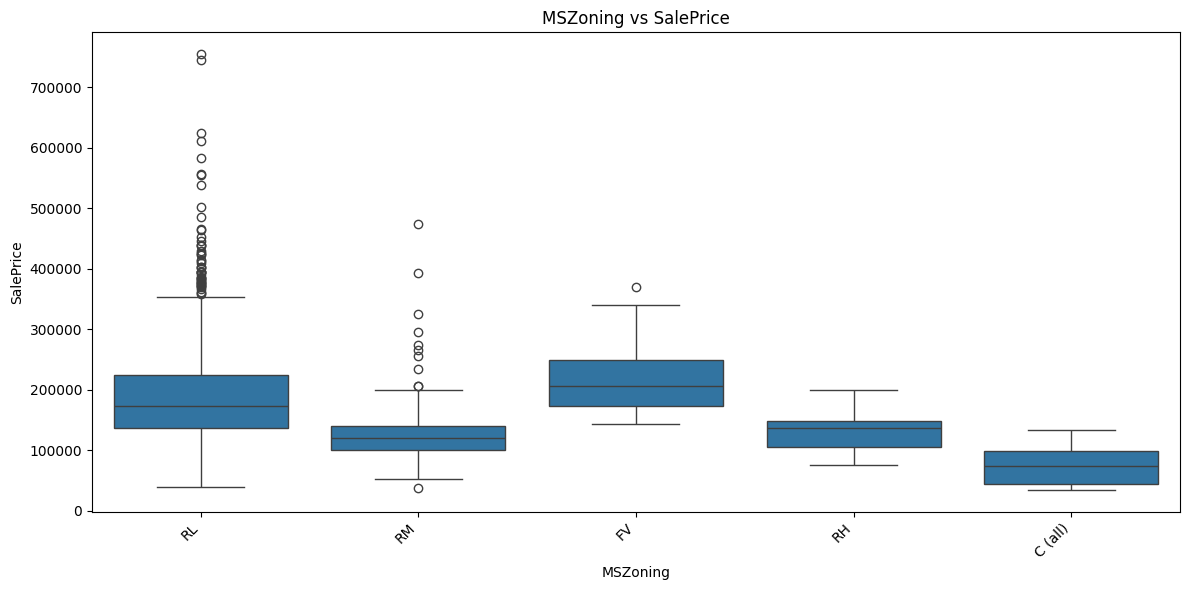

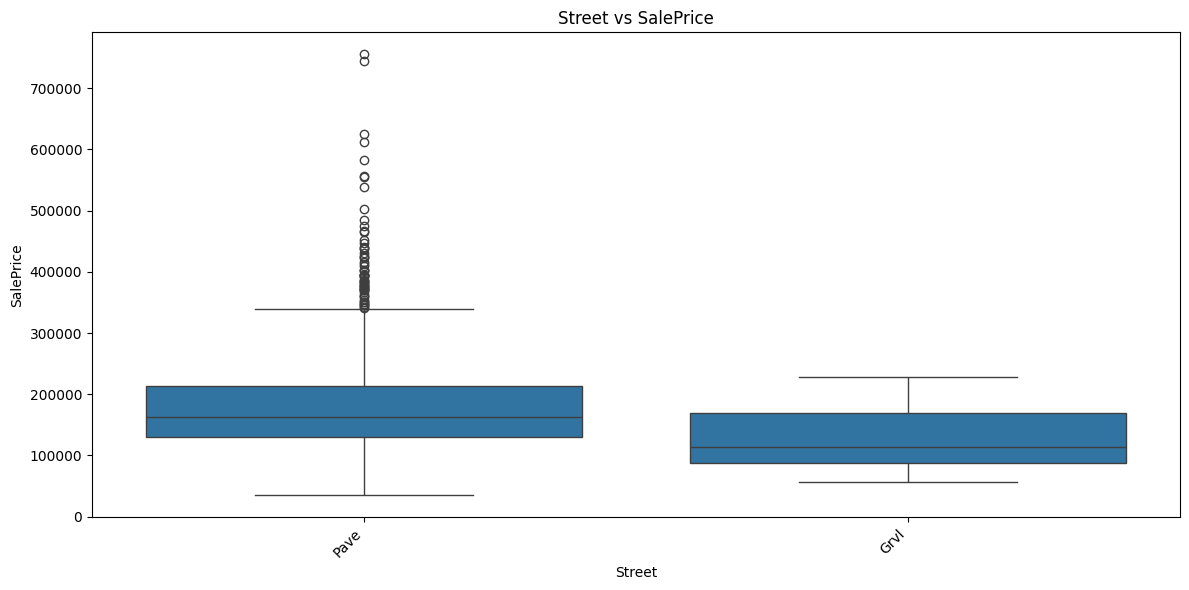

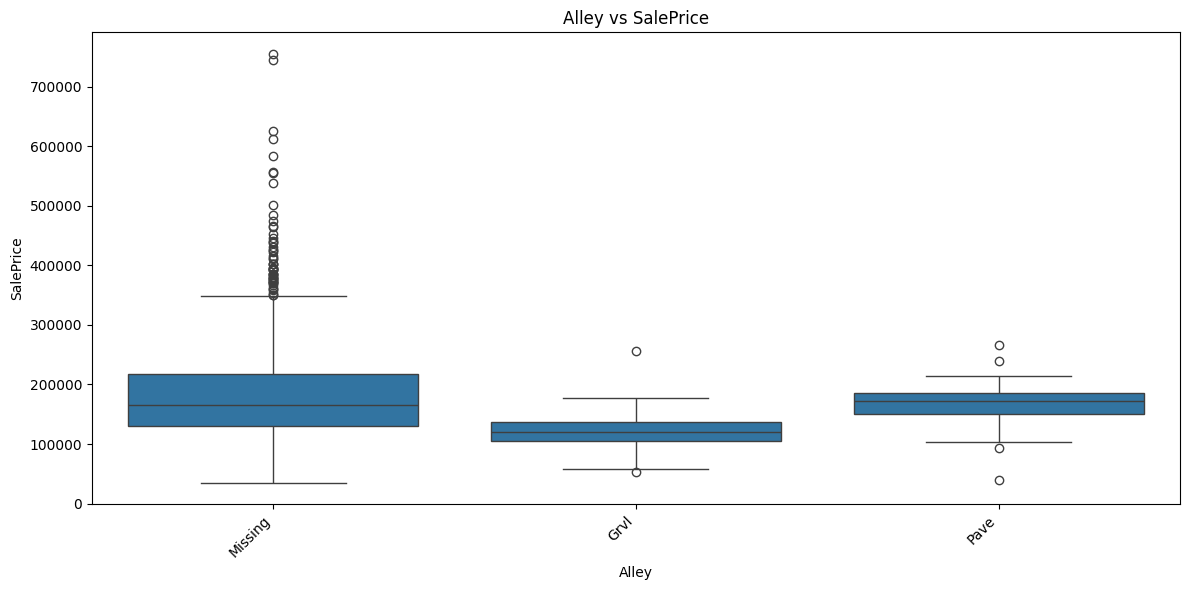

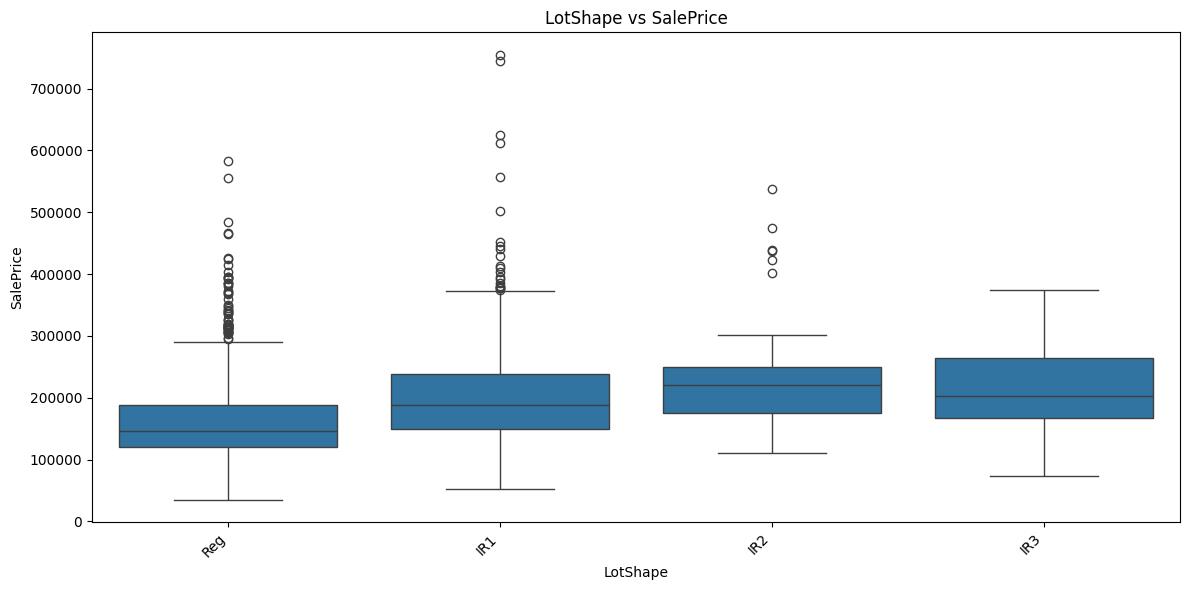

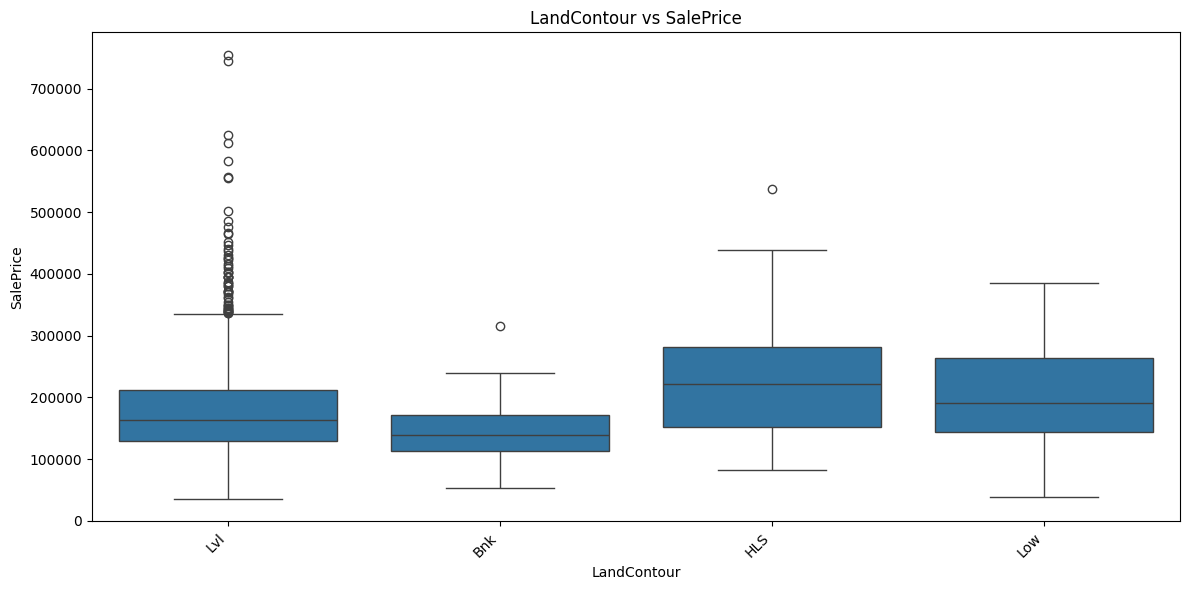

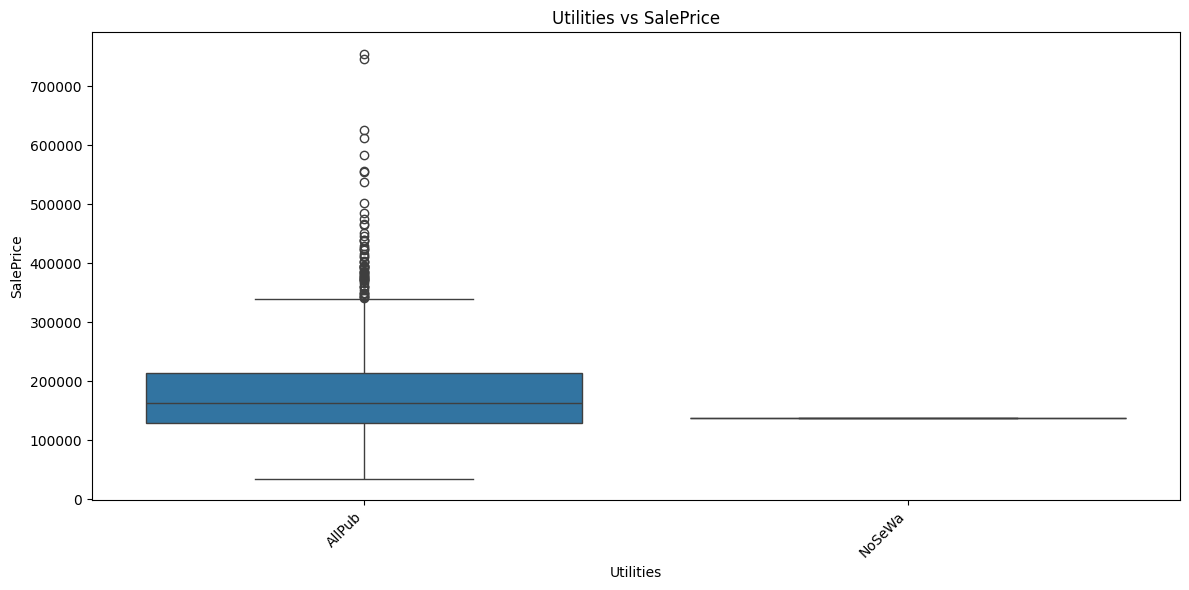

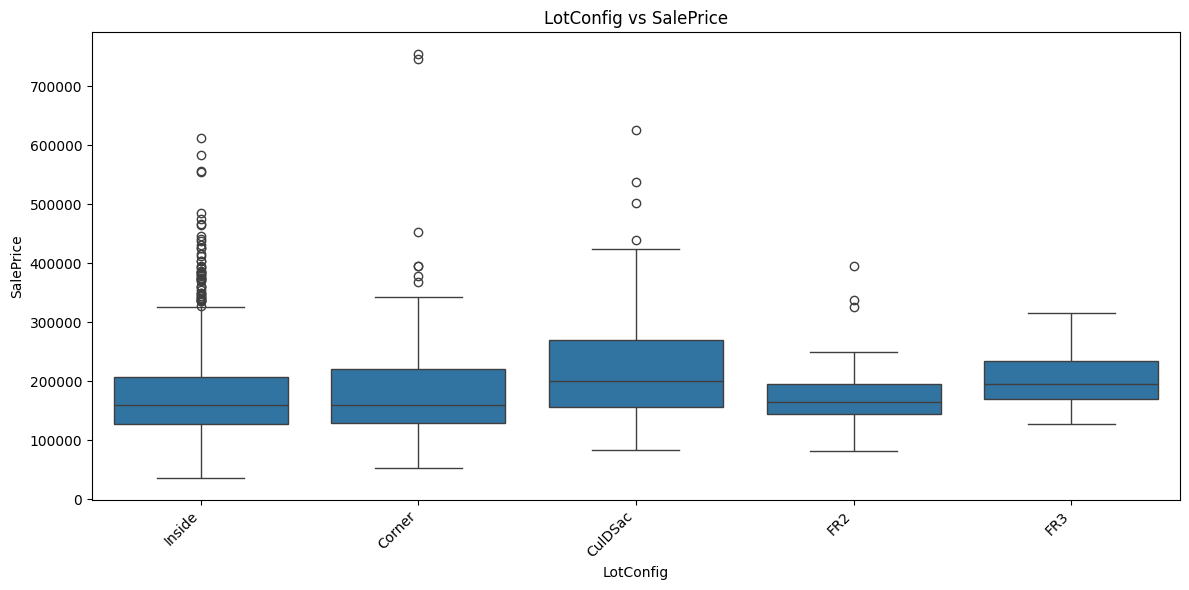

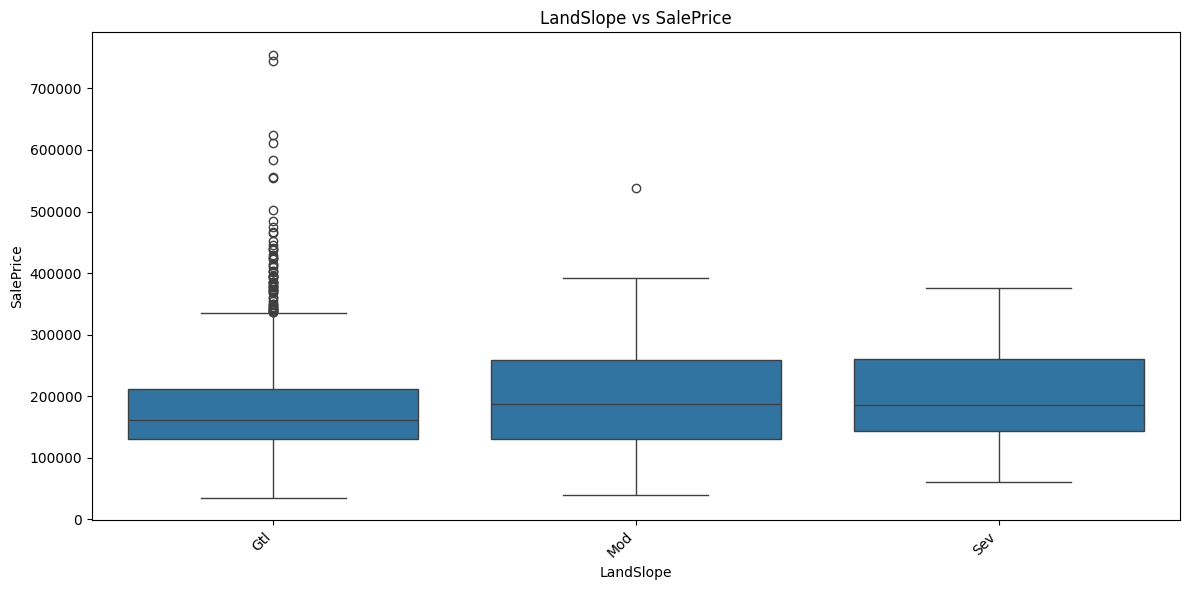

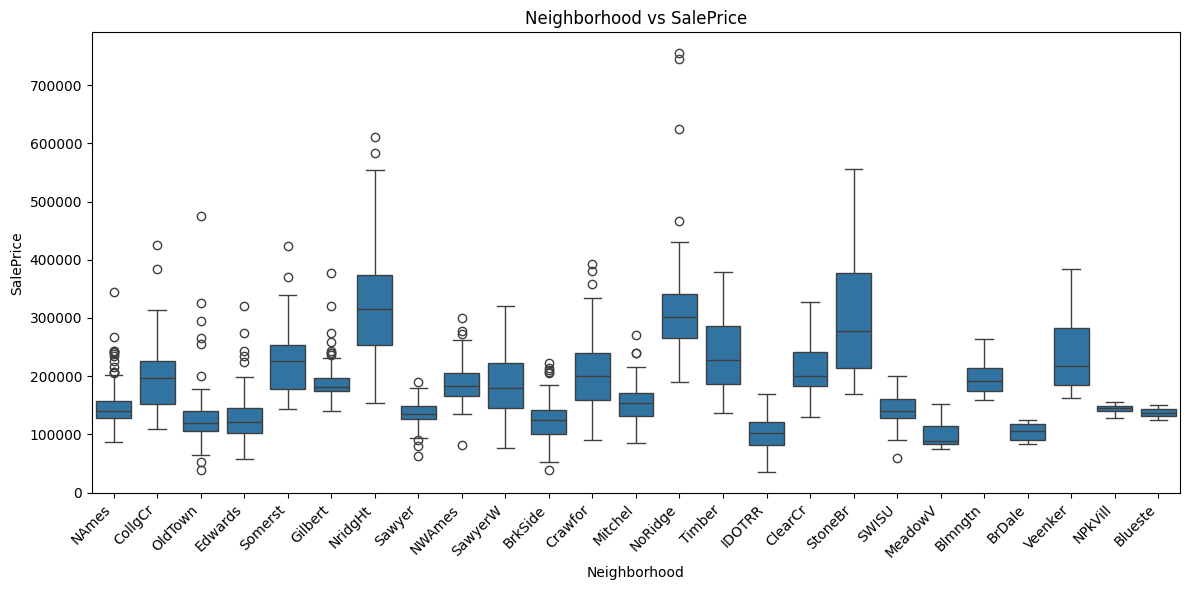

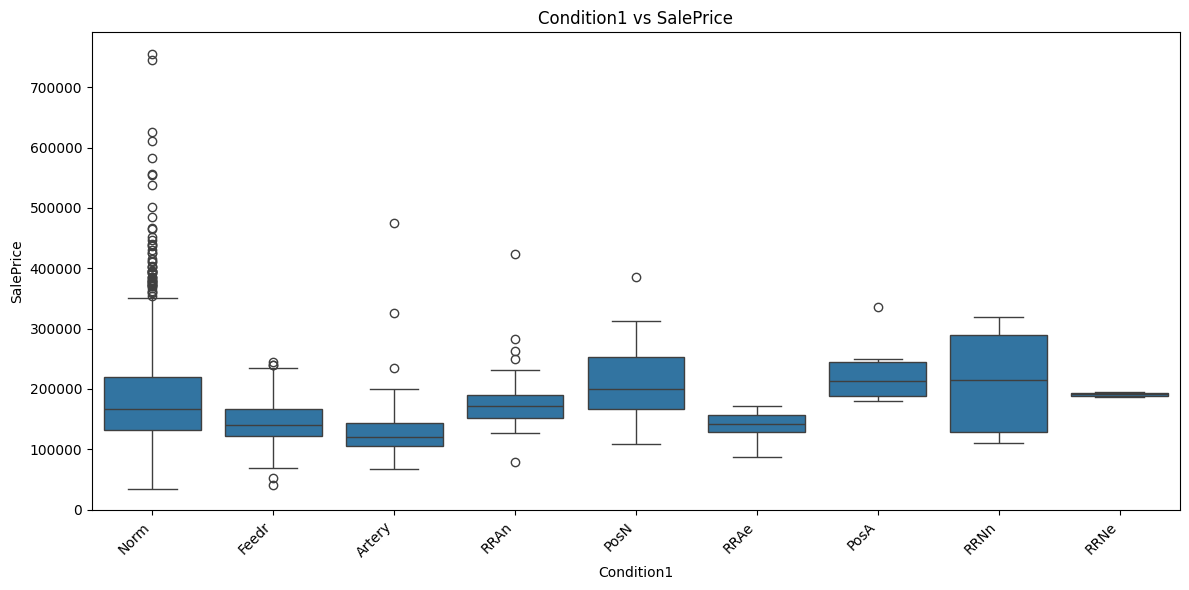

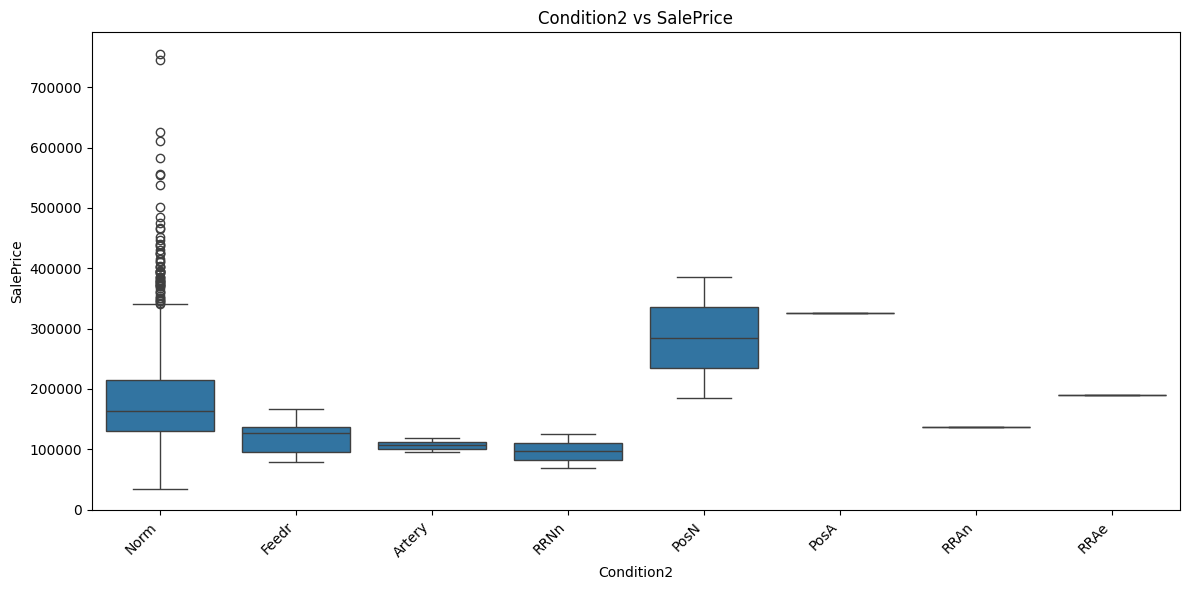

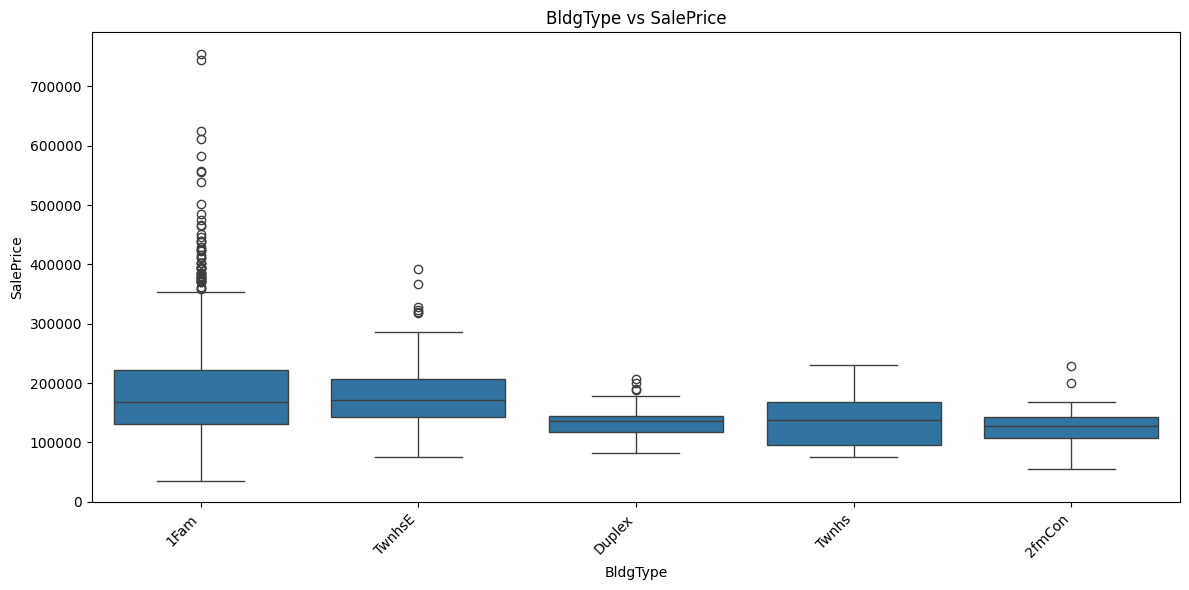

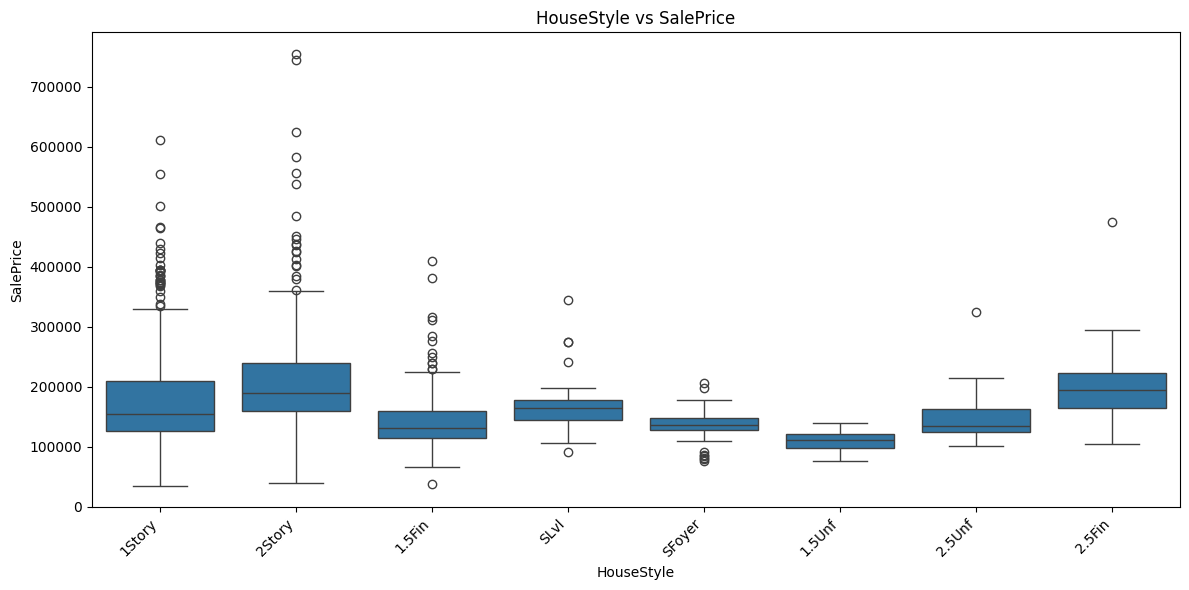

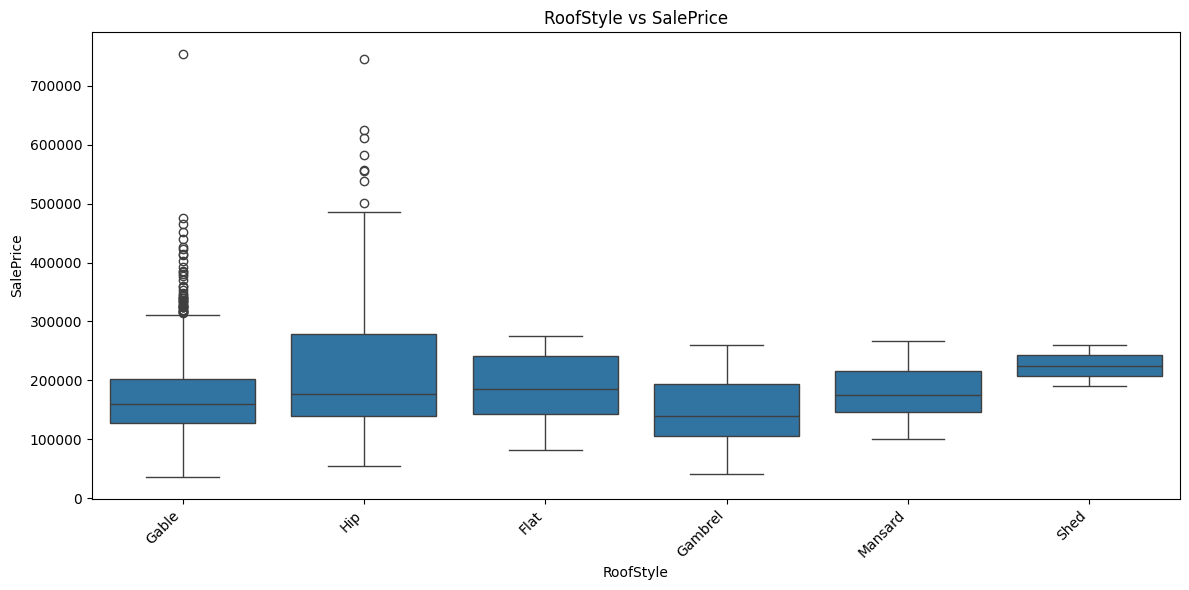

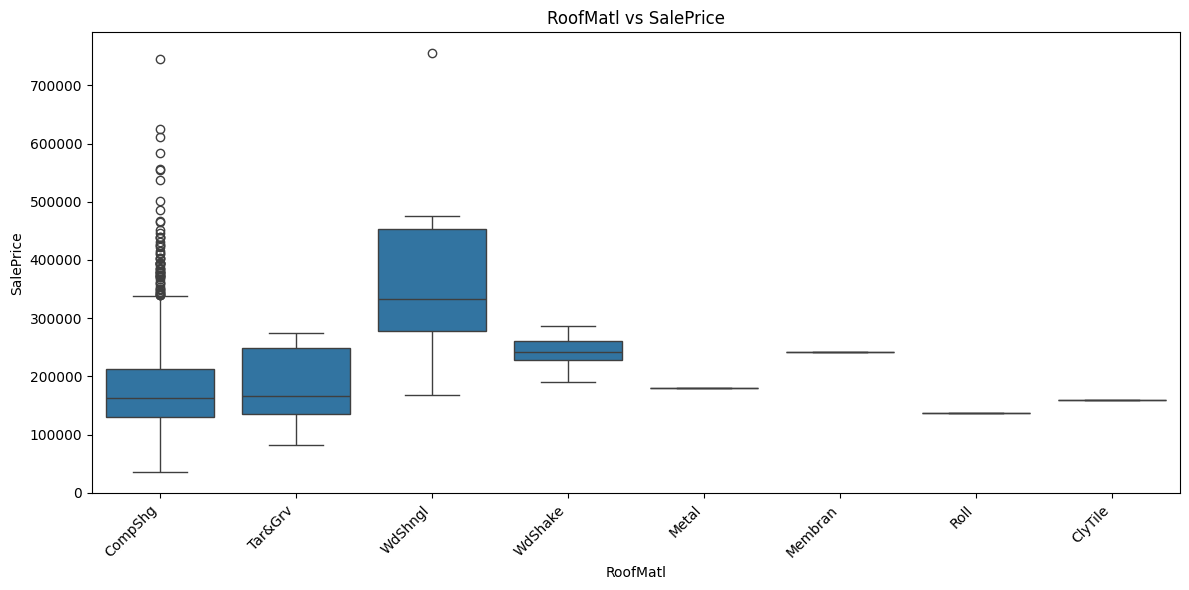

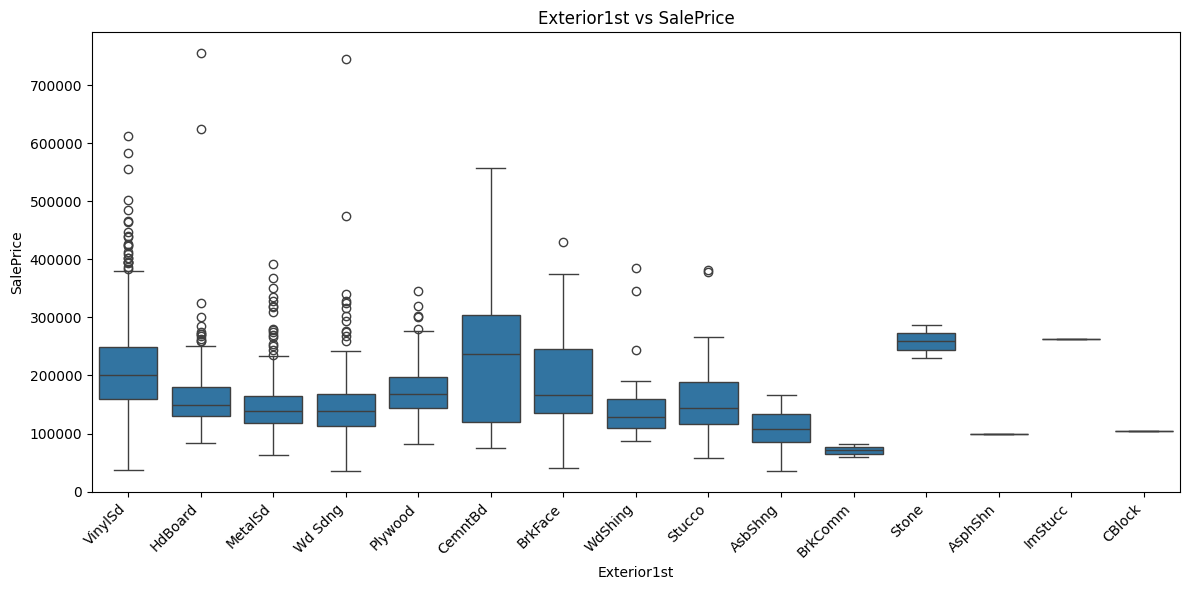

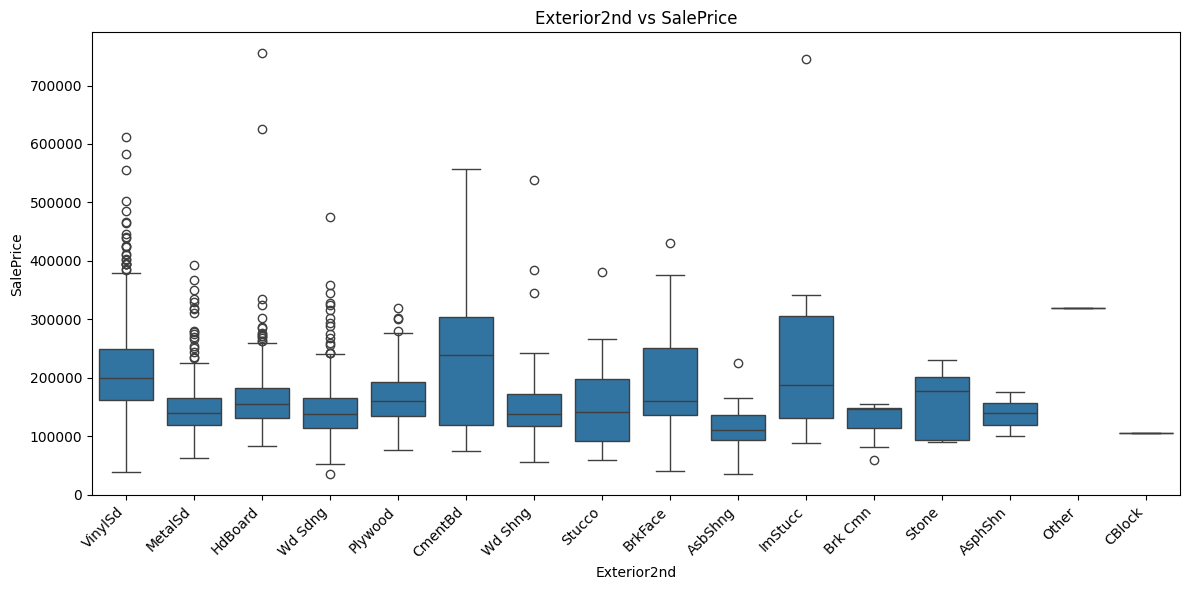

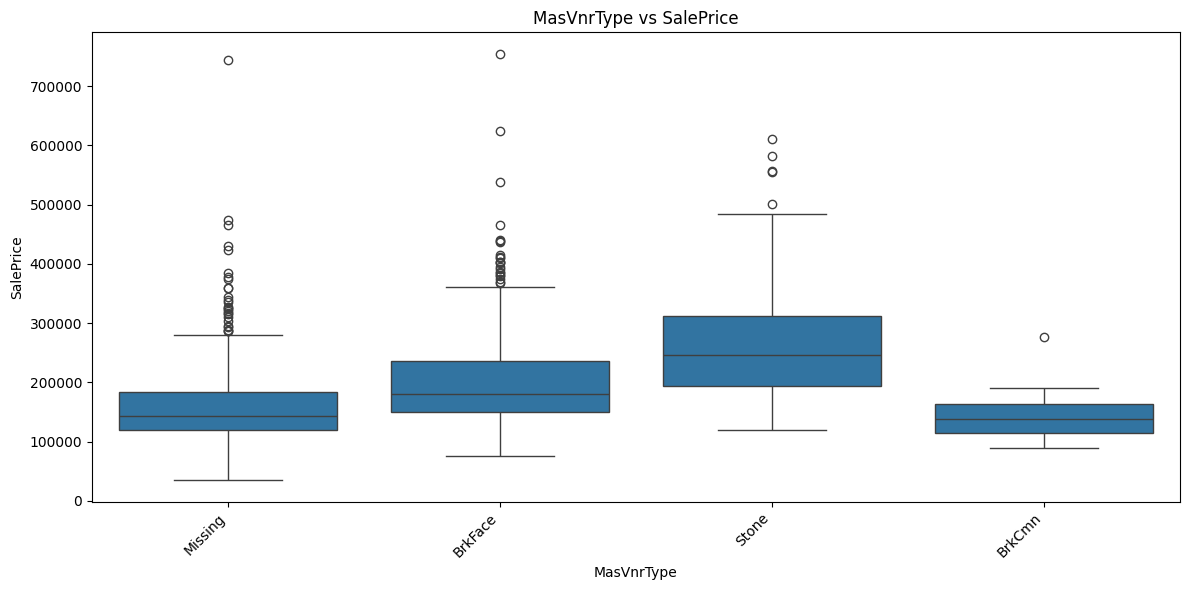

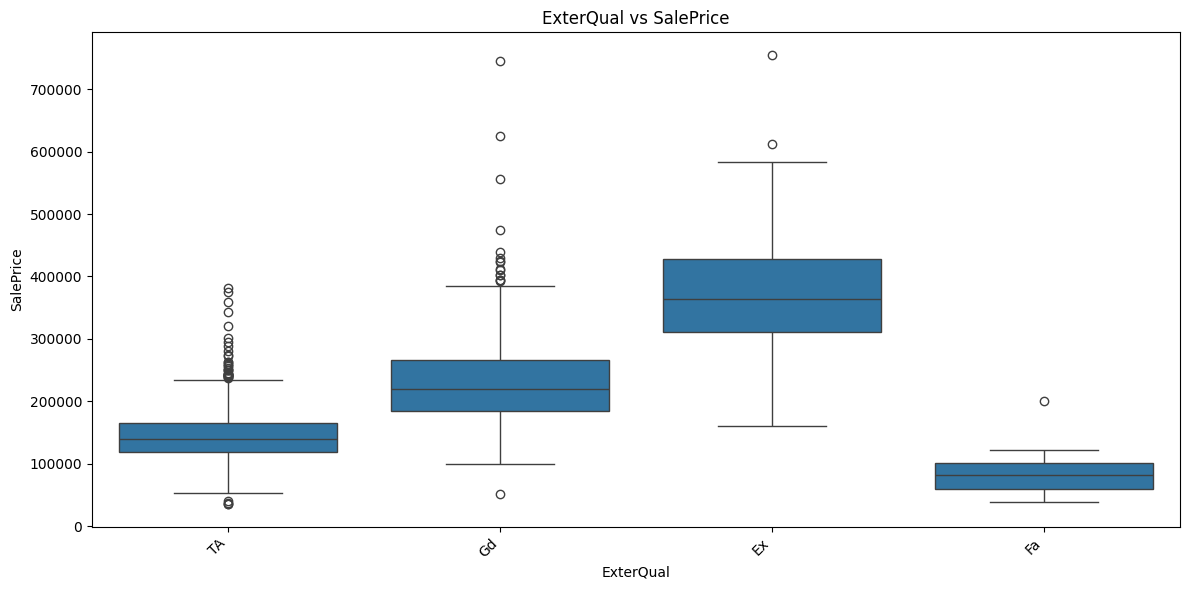

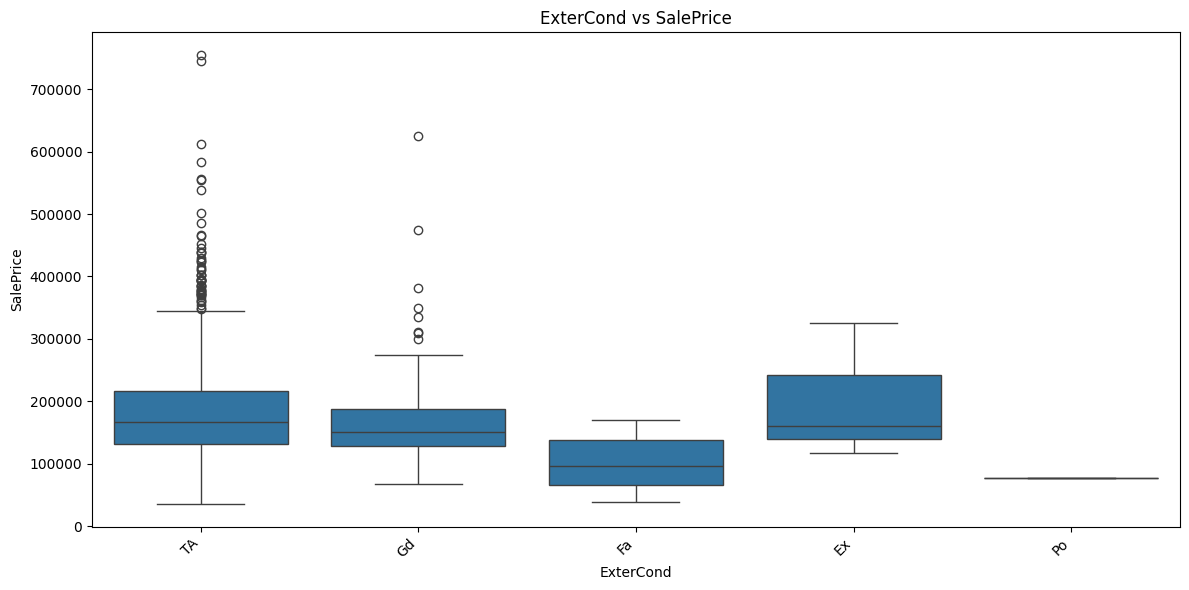

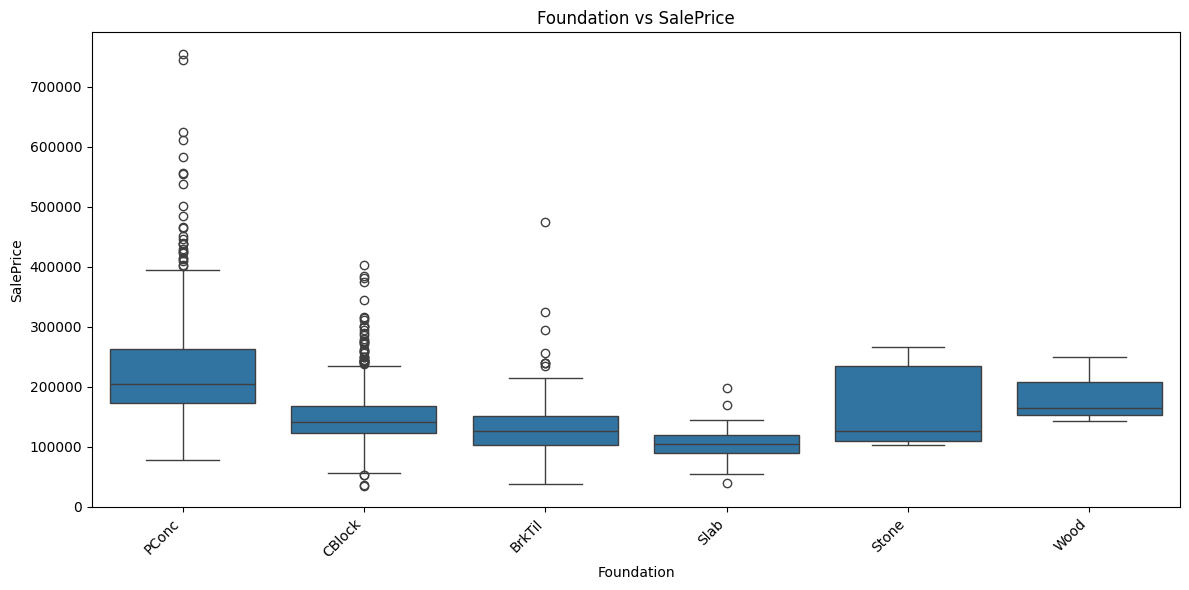

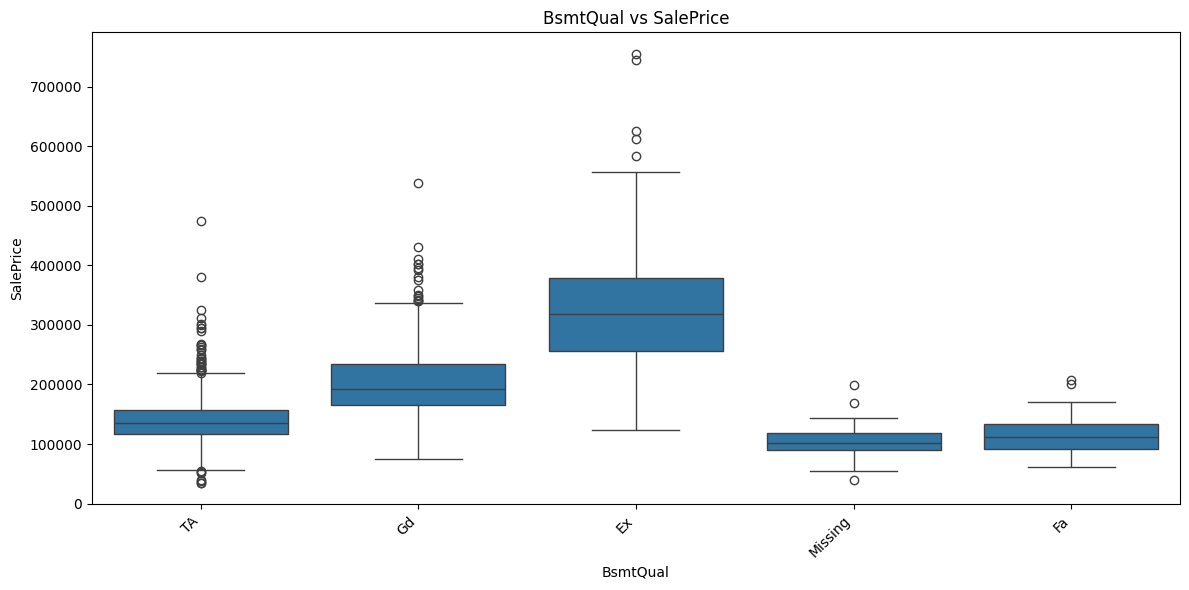

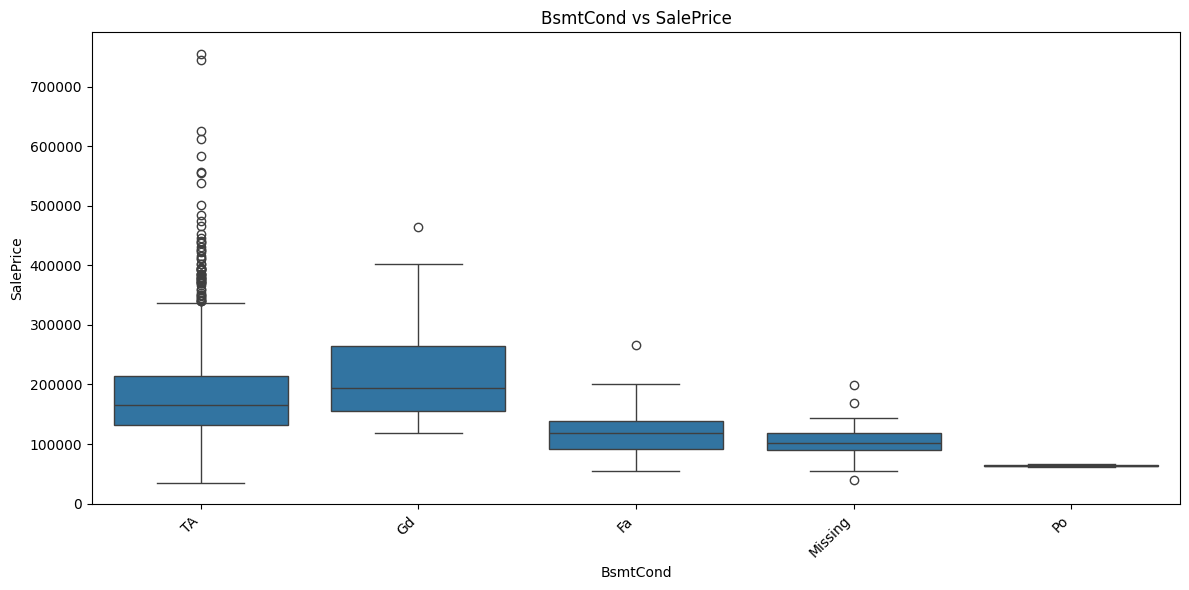

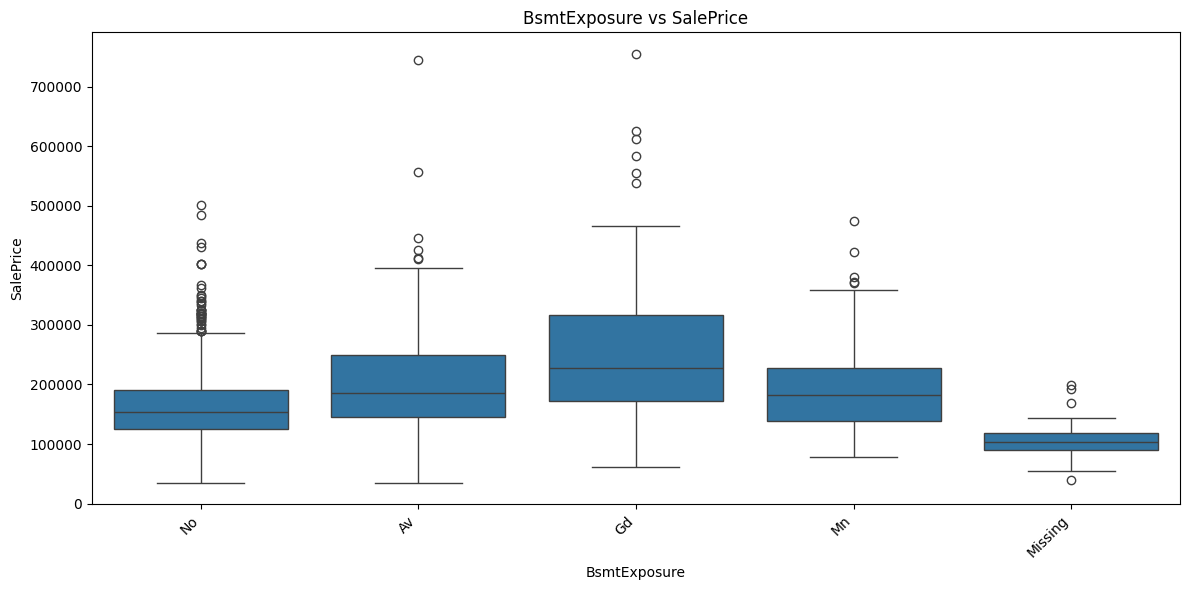

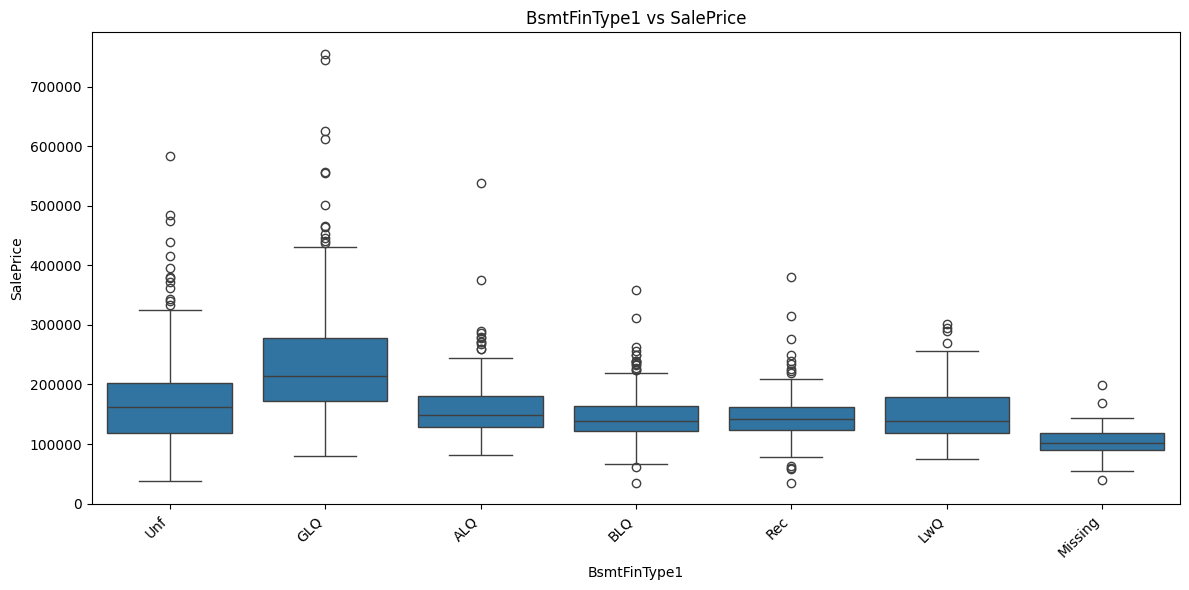

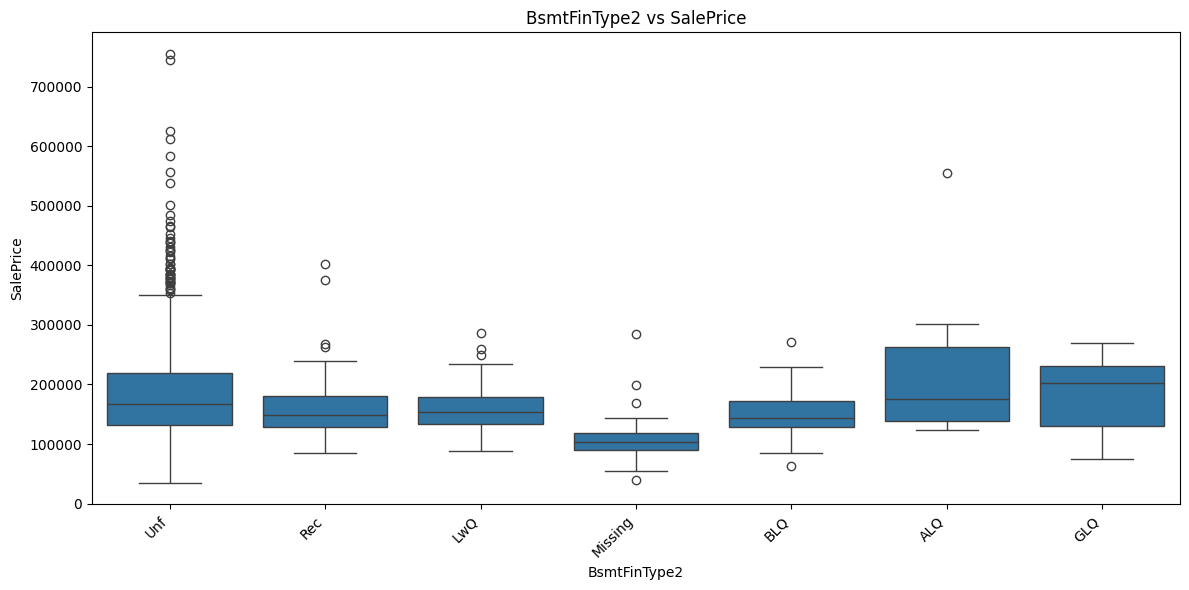

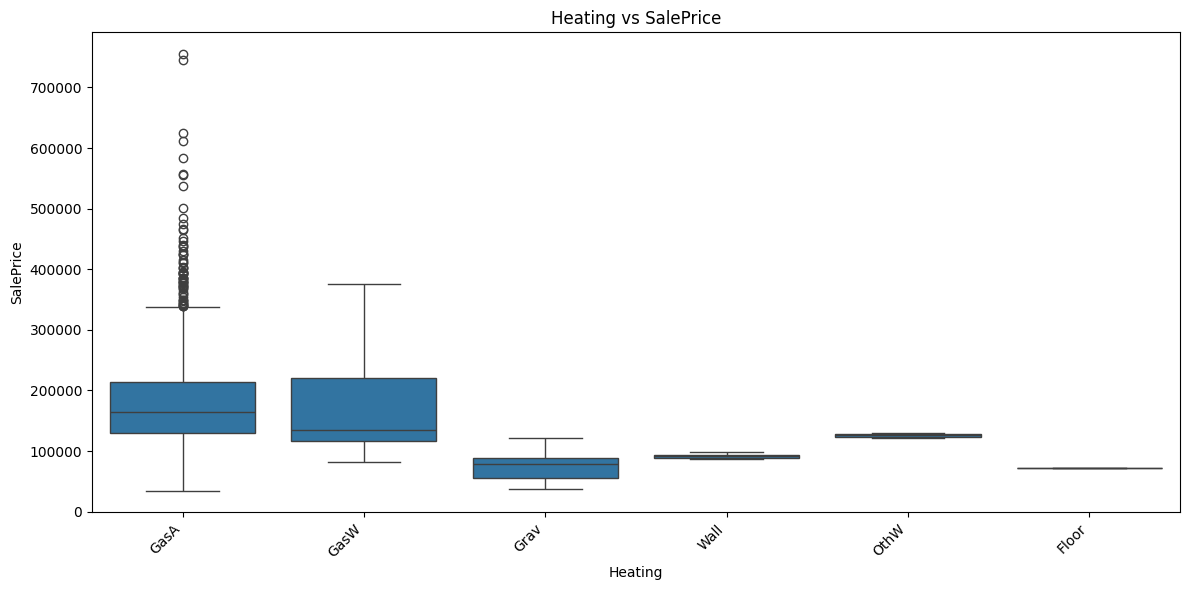

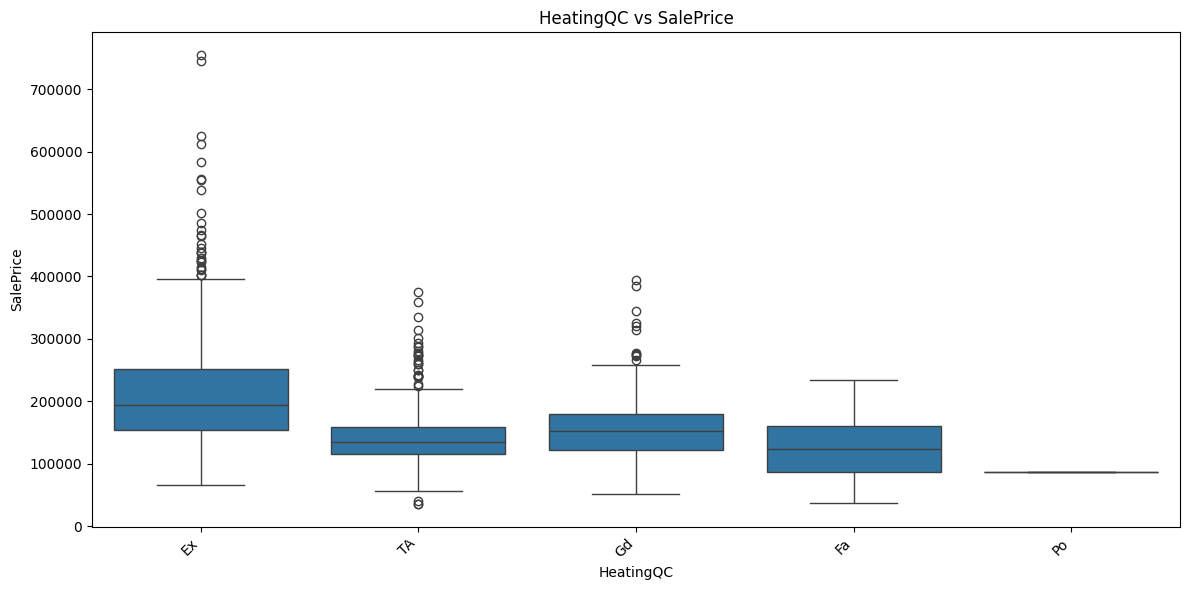

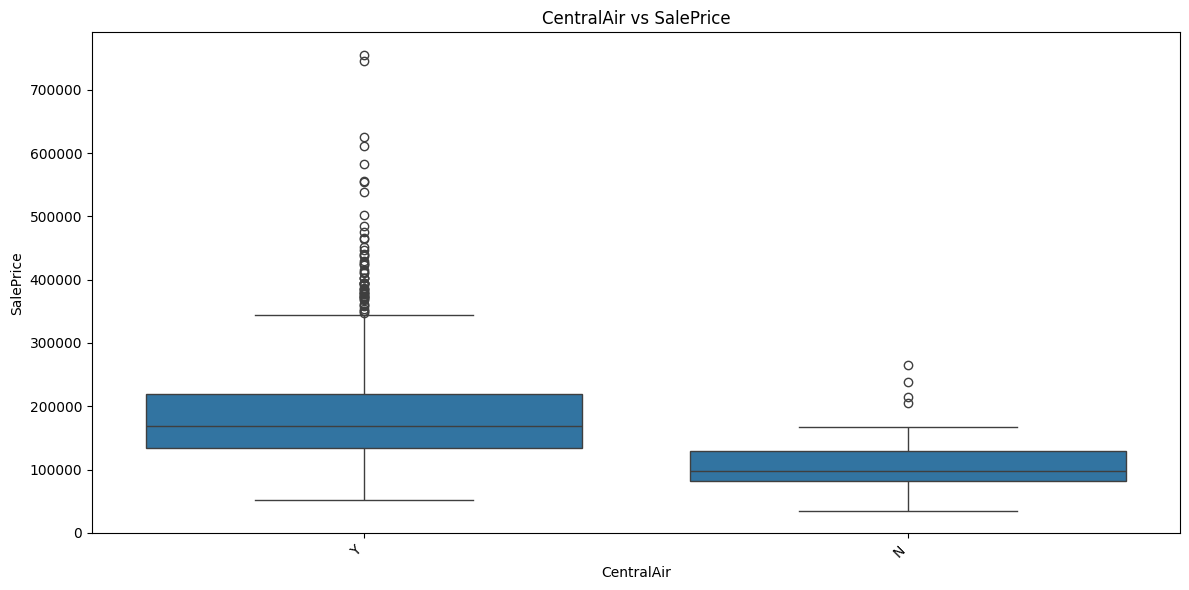

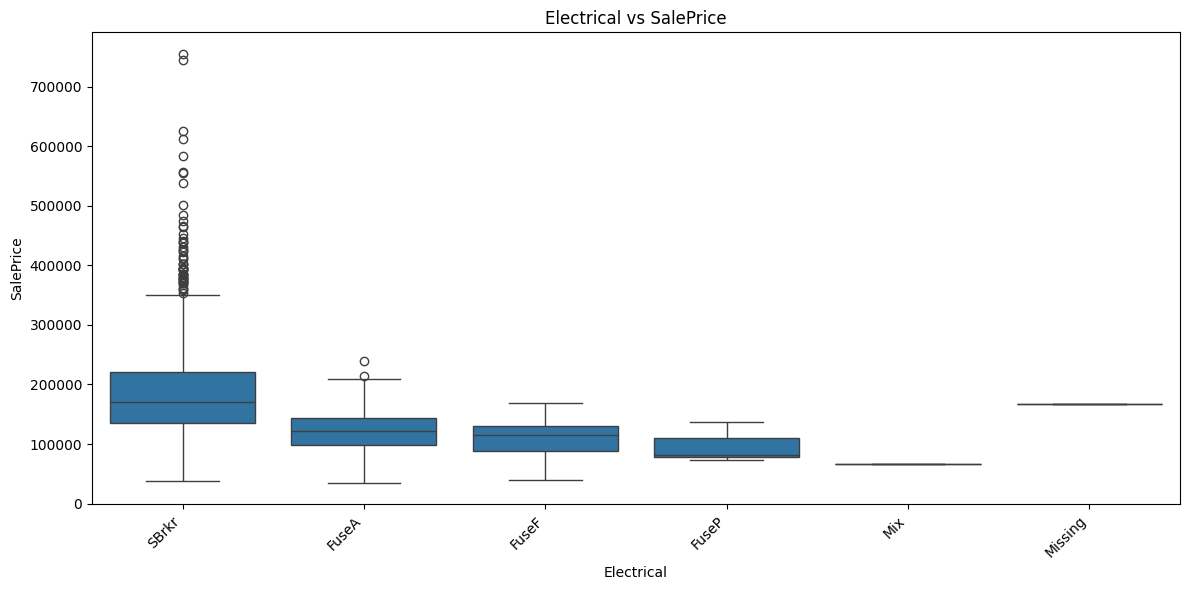

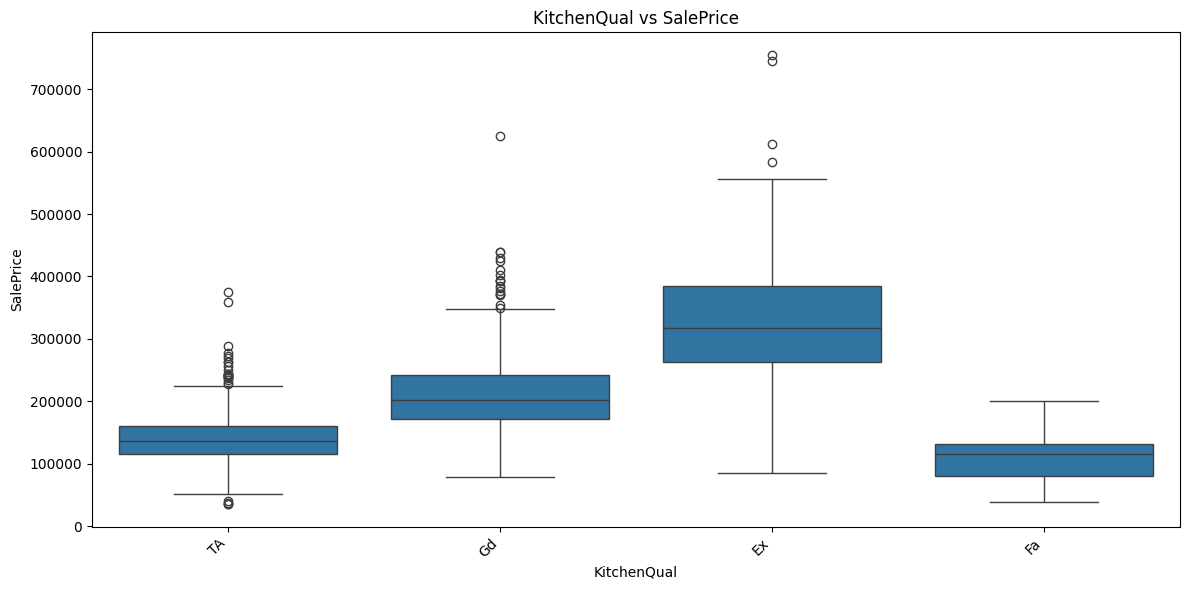

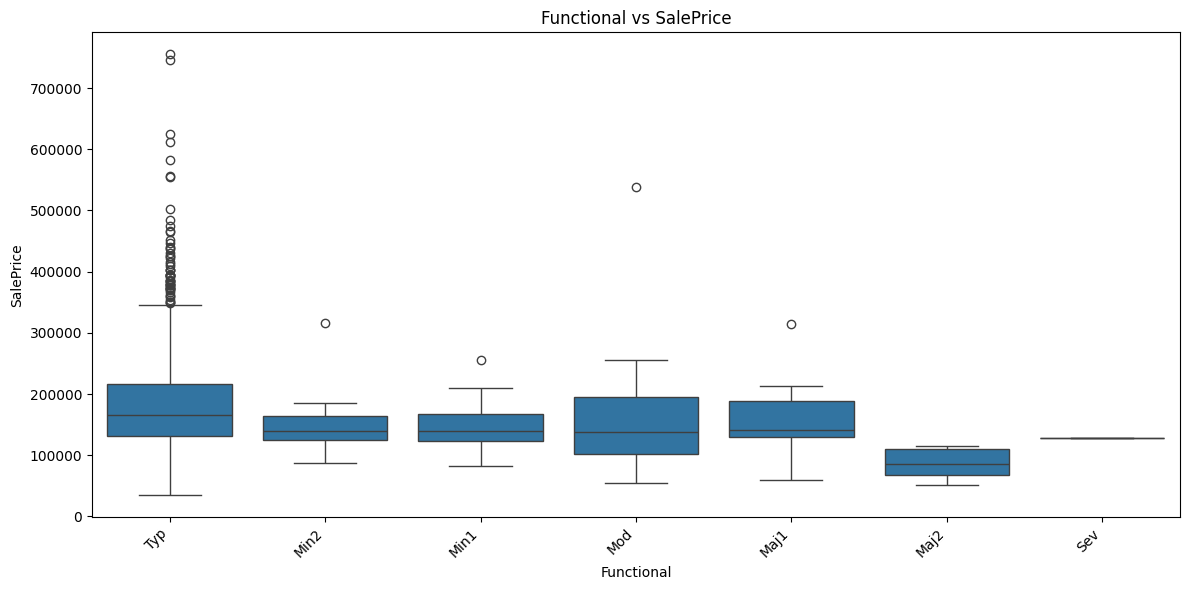

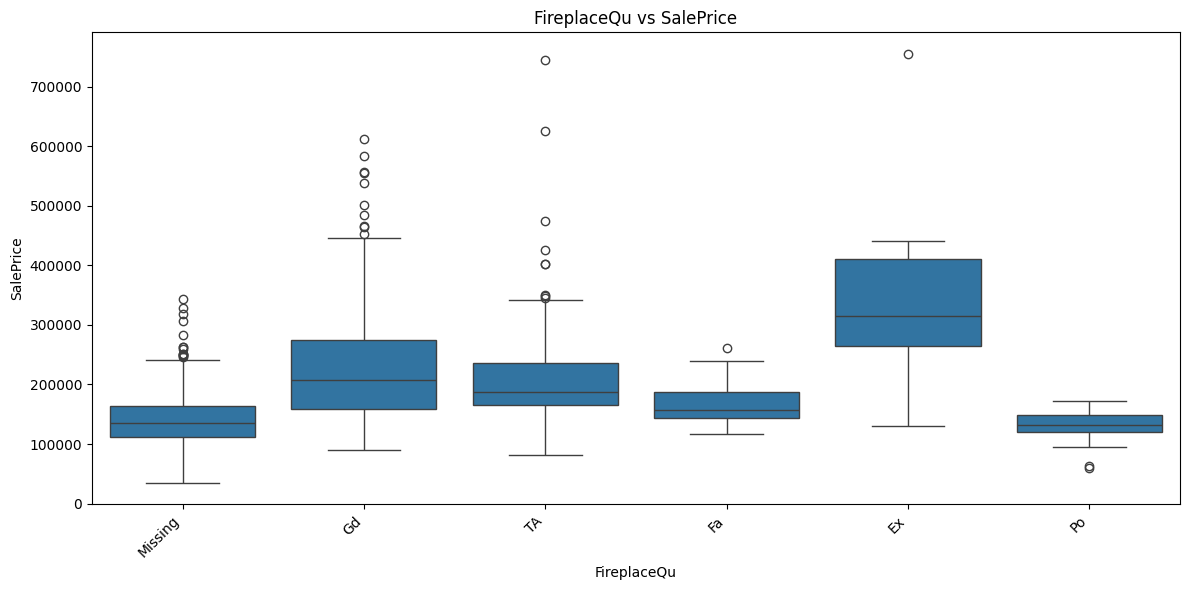

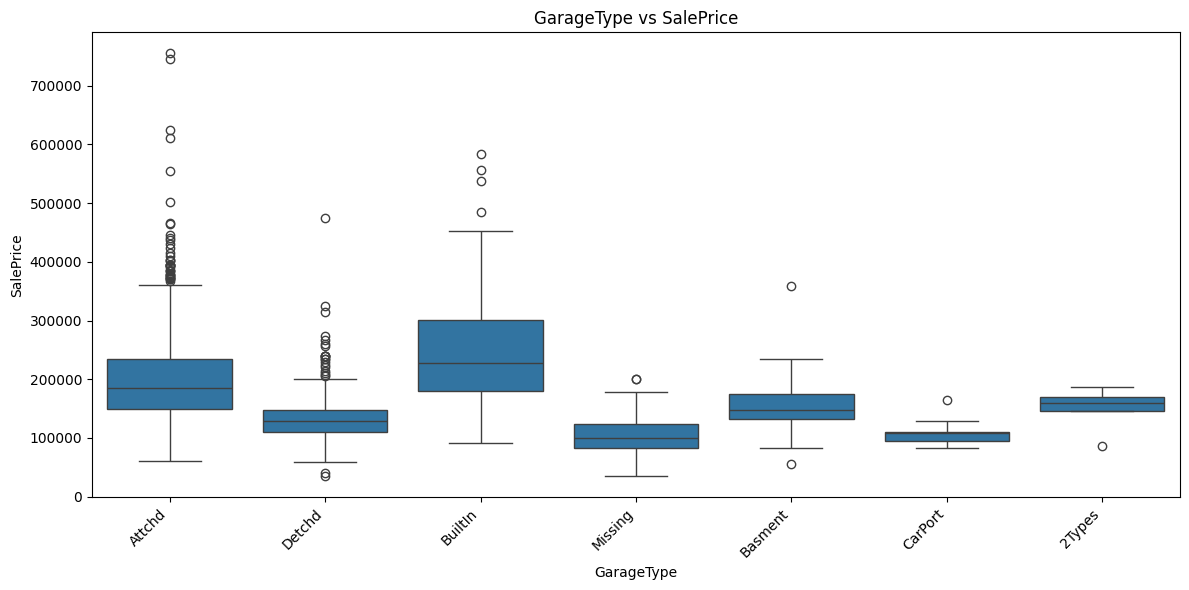

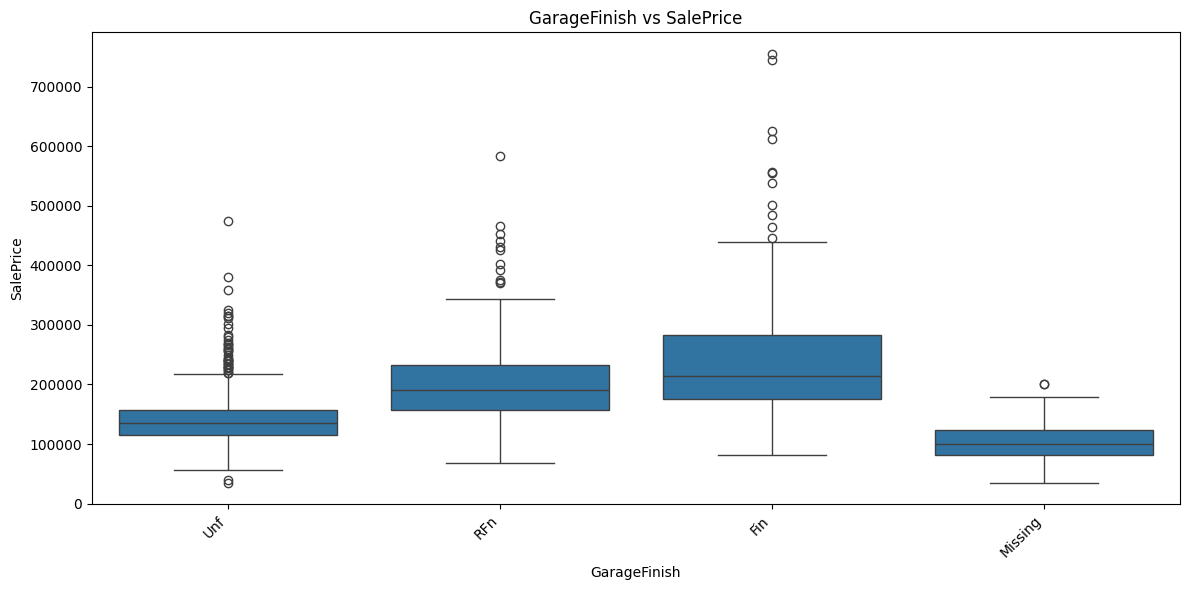

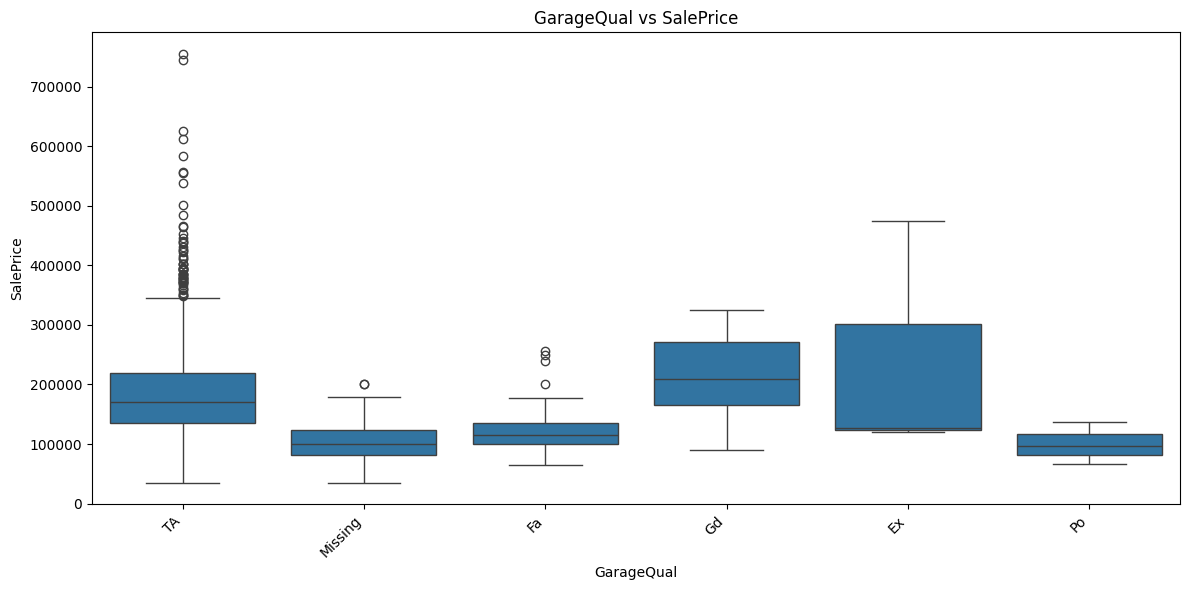

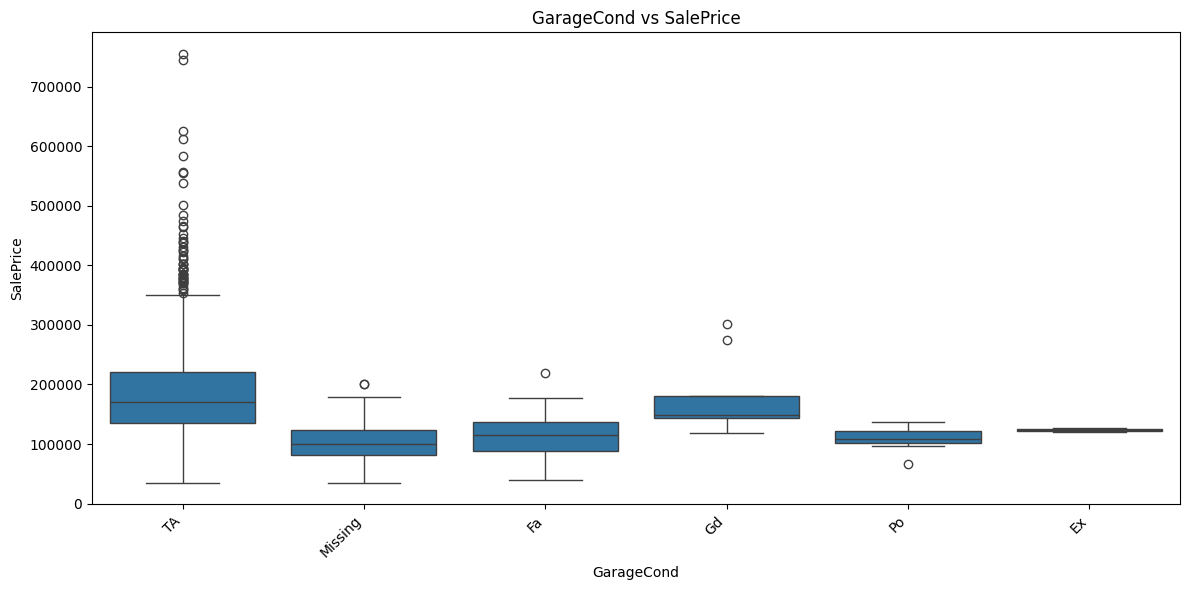

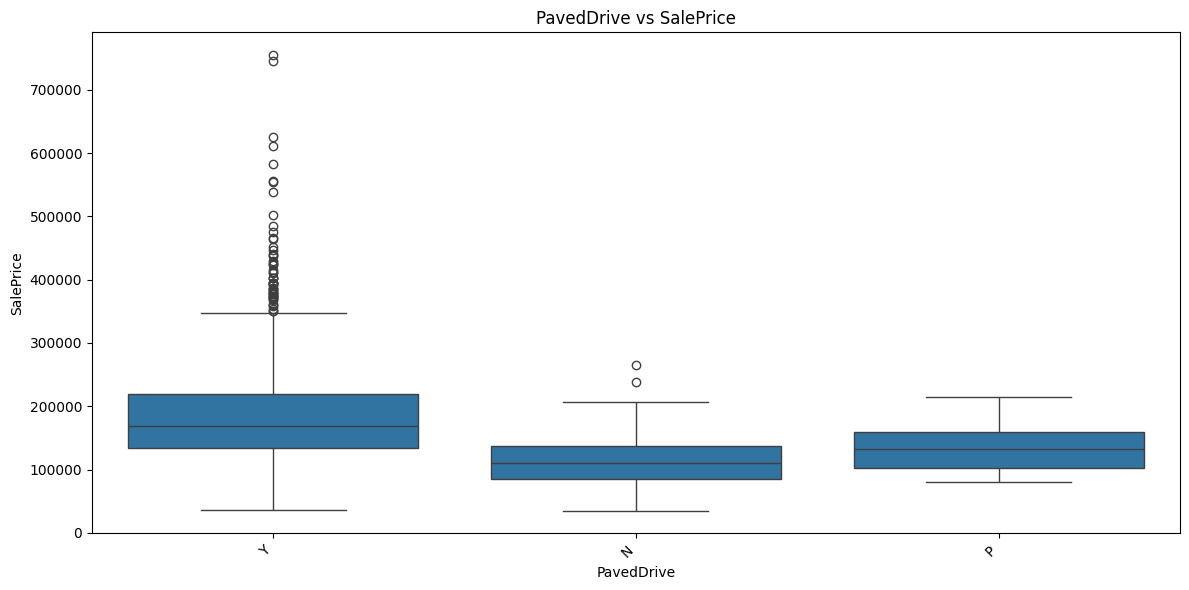

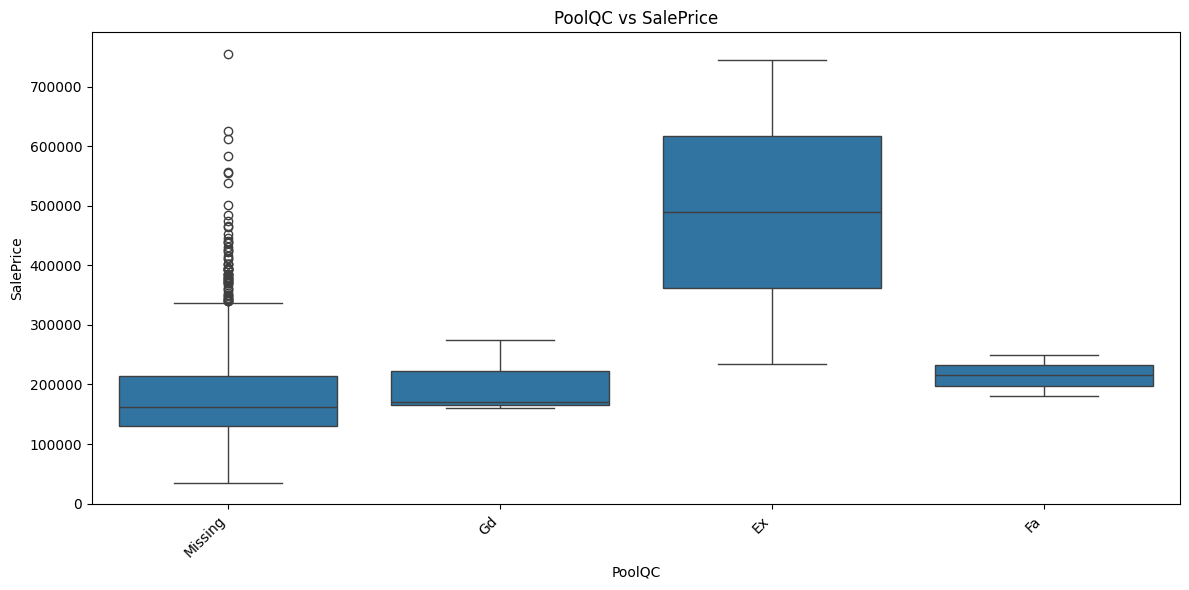

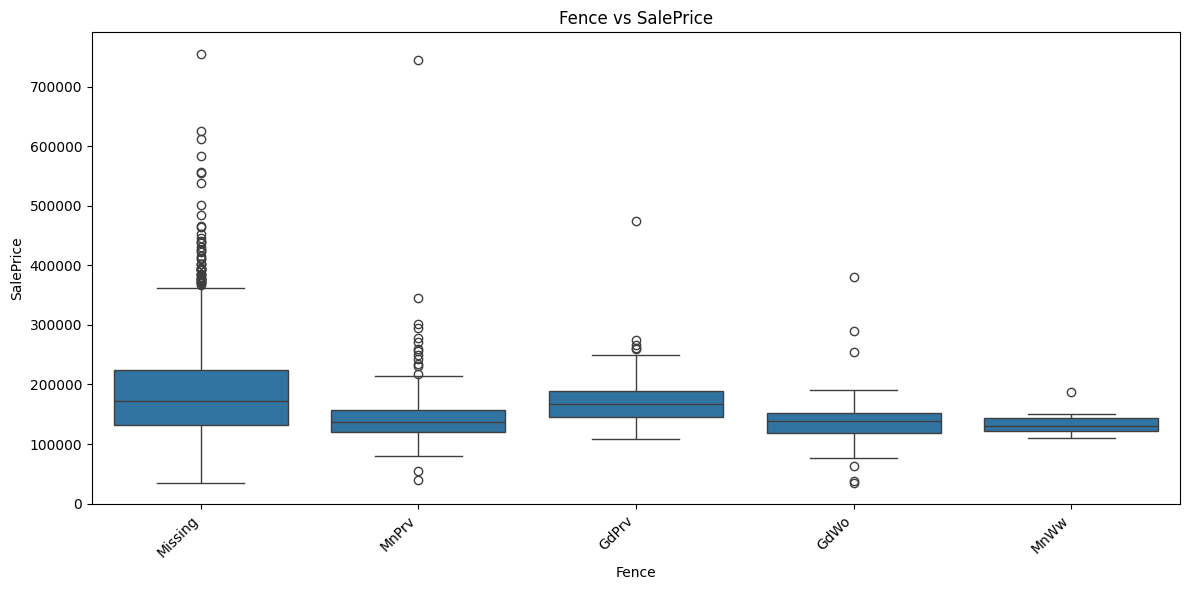

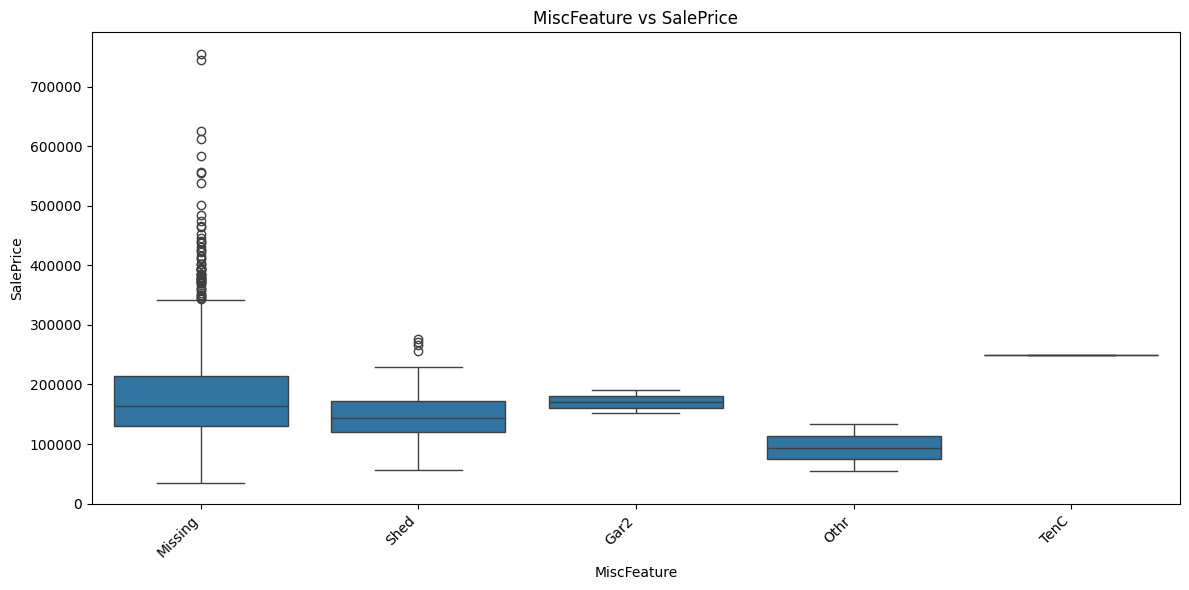

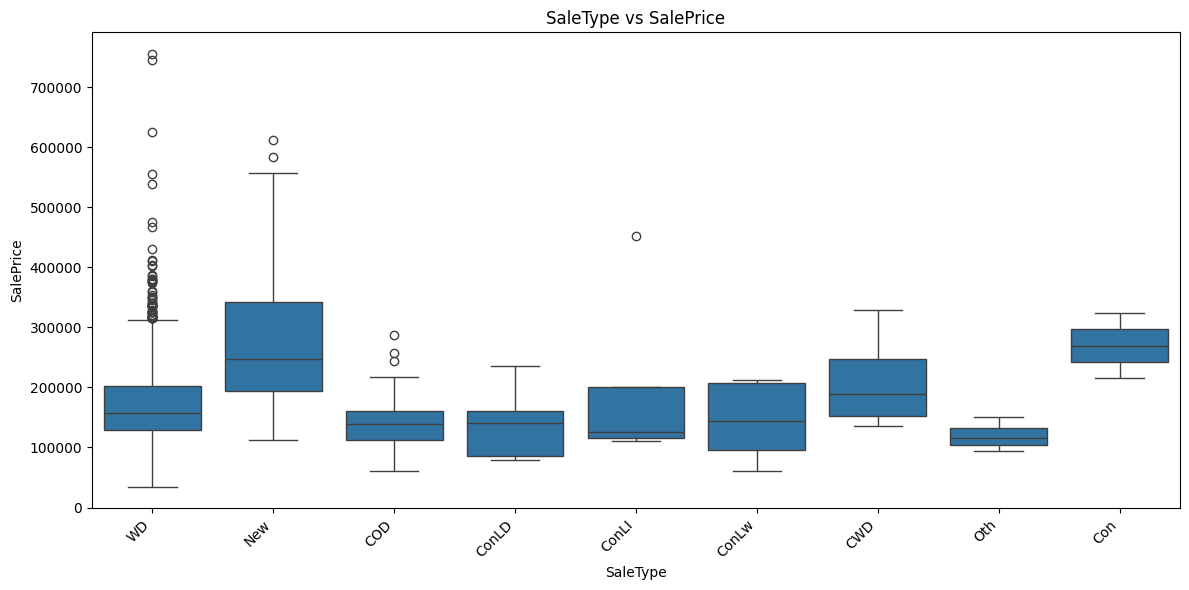

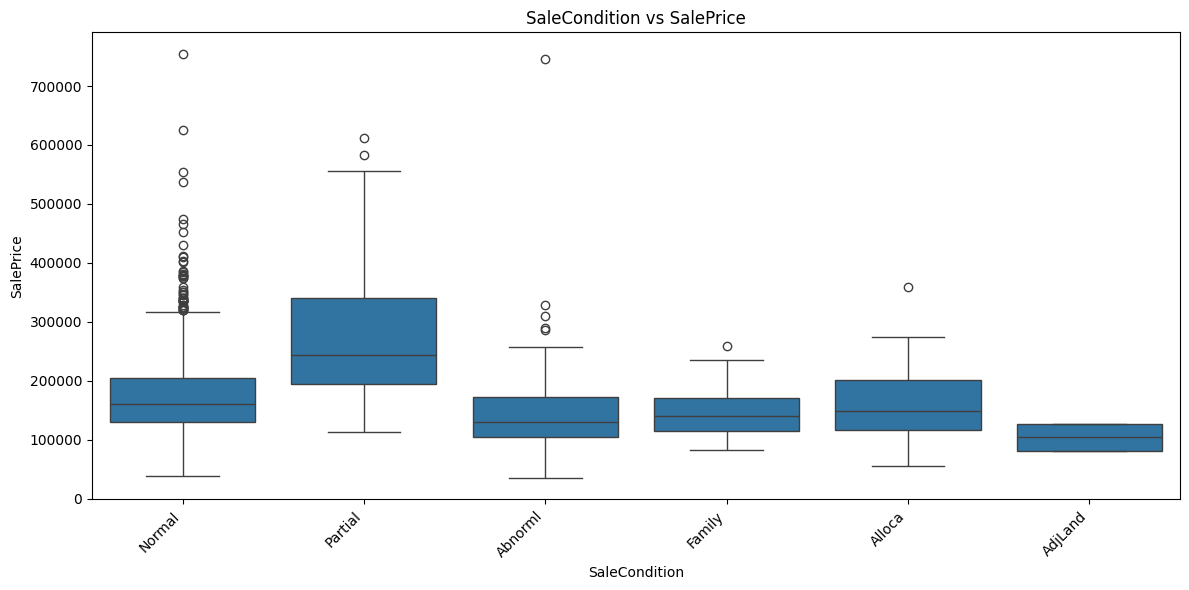

In [8]:
# 為每個類別型特徵繪製箱型圖，觀察其與房價的關聯
print('===== 類別型特徵與房價的箱型圖 =====')
save_dir = FIGURES_DIR / 'cat_boxplots'
save_dir.mkdir(parents=True, exist_ok=True)
print(f'圖表將儲存至: {save_dir}')

for col in cat_cols:
    plt.figure(figsize=(12, 6))
    temp = train.copy()
    temp[col] = temp[col].fillna('Missing')
    counts = temp[col].value_counts(dropna=False)
    order = counts.index.tolist()
    ax = sns.boxplot(x=col, y='SalePrice', data=temp, order=order)
    plt.title(f'{col} vs SalePrice')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(save_dir / f'{col}_boxplot.png')
    plt.show()
    plt.close()

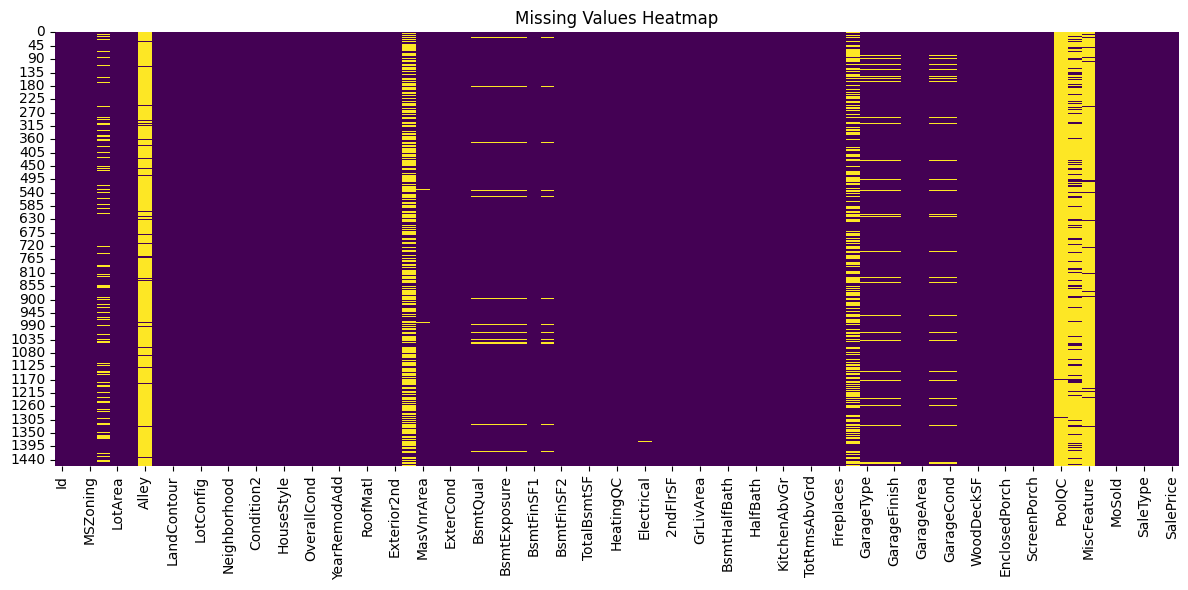

In [9]:
# 缺失值熱力圖
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'missing_heatmap.png')
plt.show()

===== 數值型特徵分佈圖與偏度分析 =====
圖表將儲存至: /Users/jim/Documents/home-data-for-ml-course/reports/figures/num_distributions


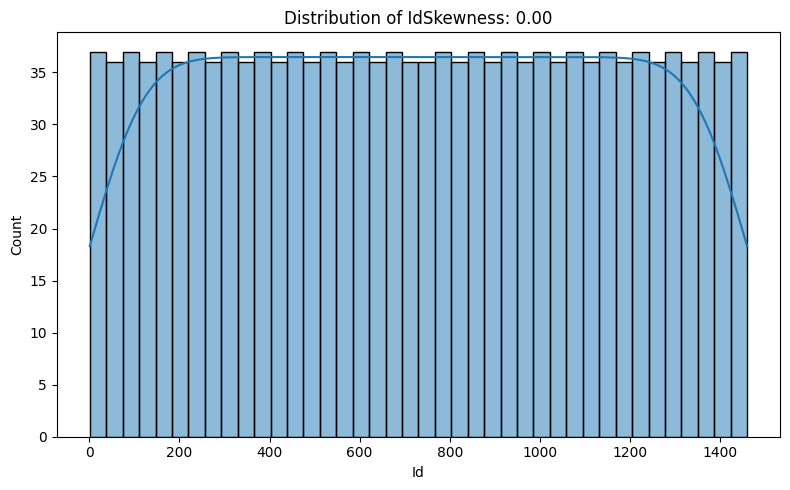

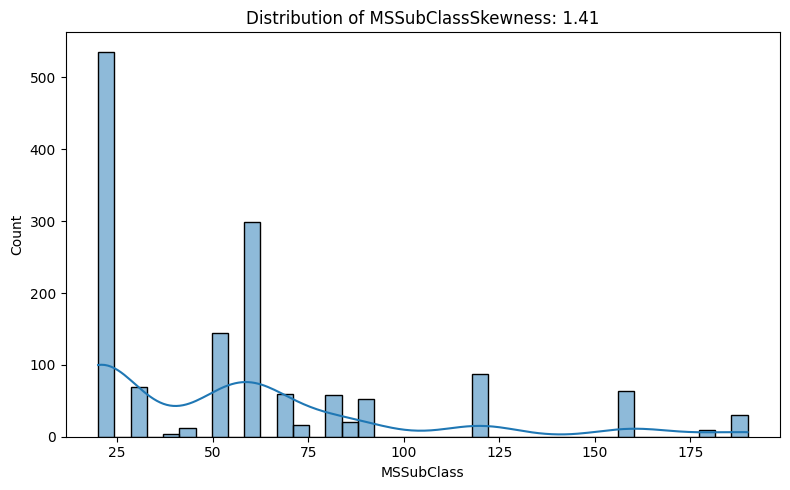

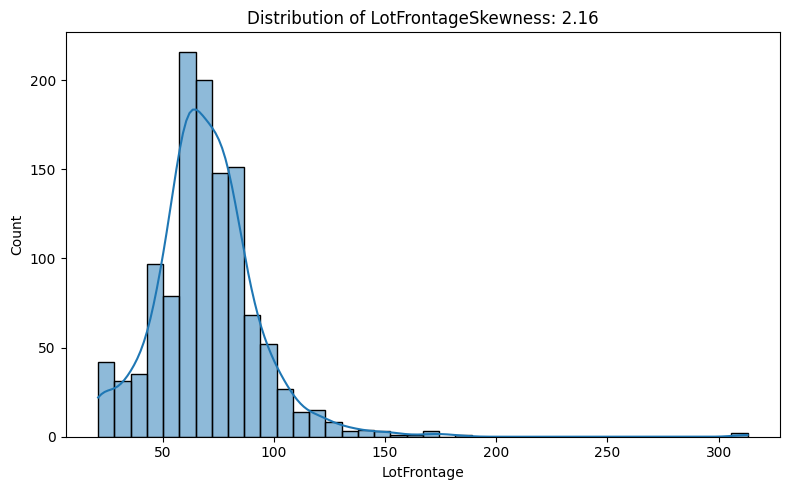

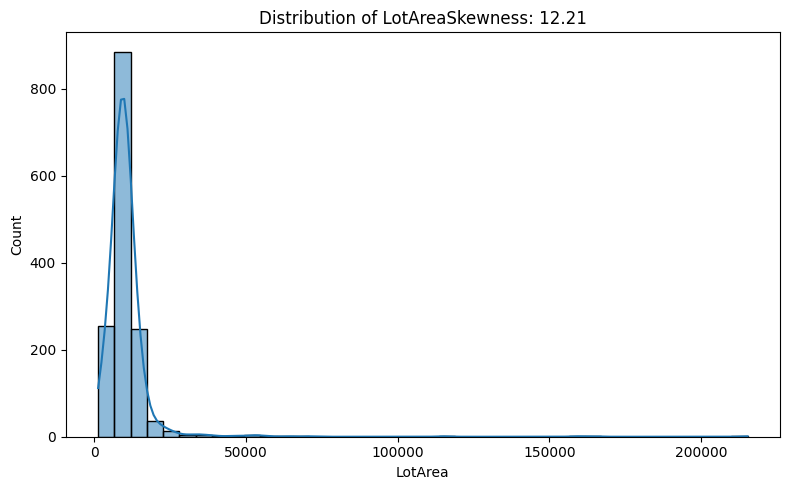

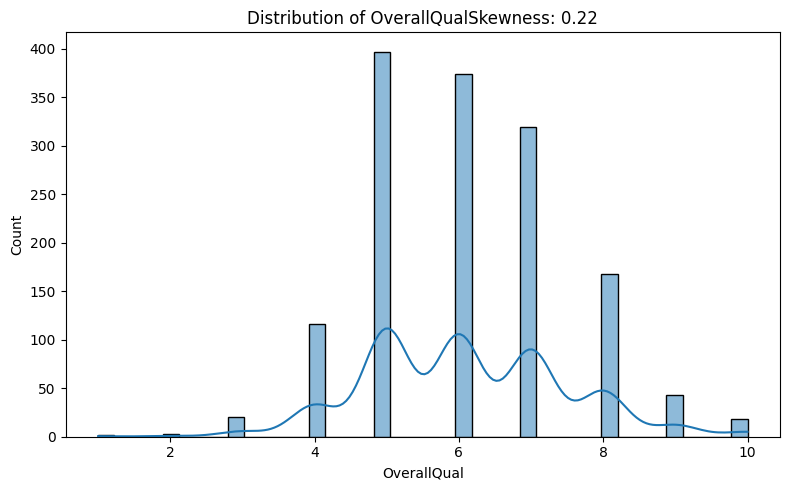

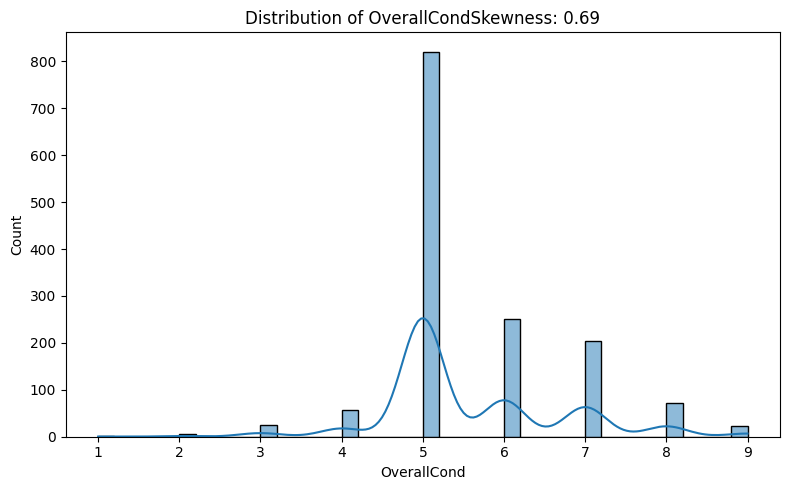

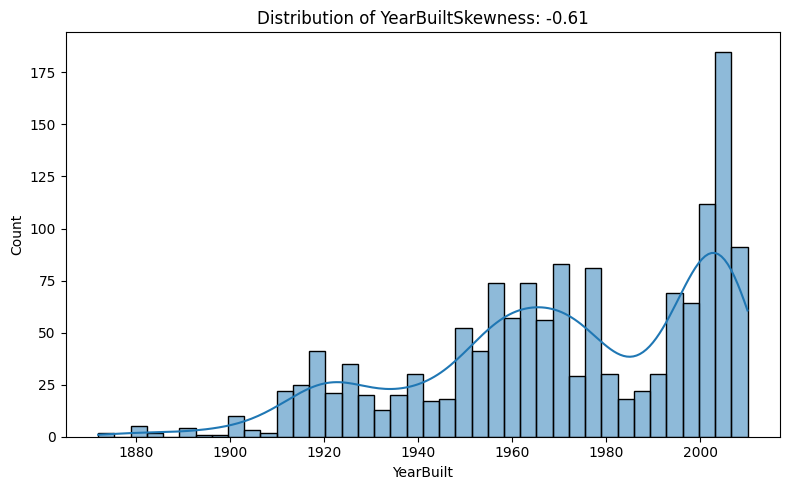

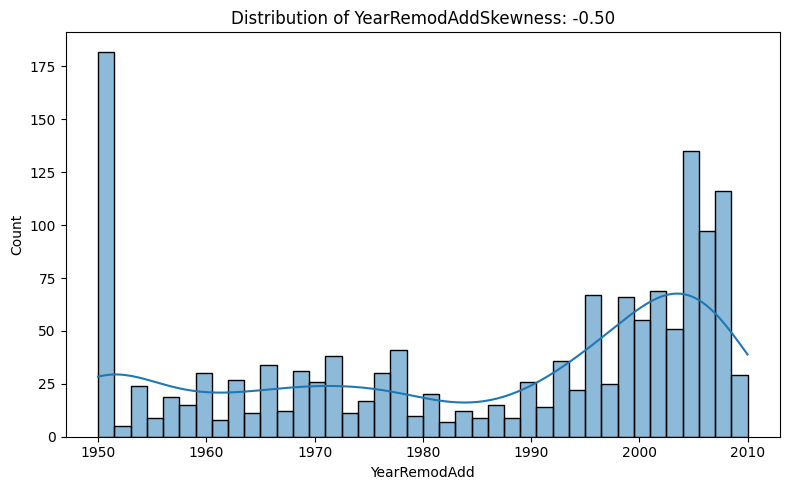

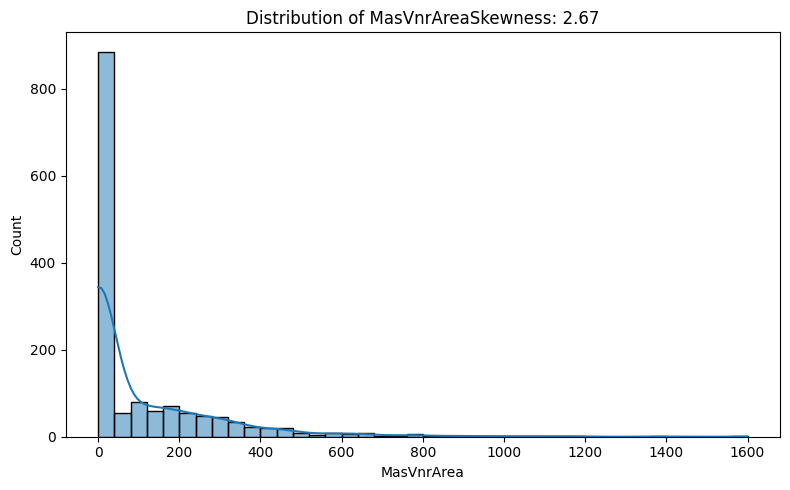

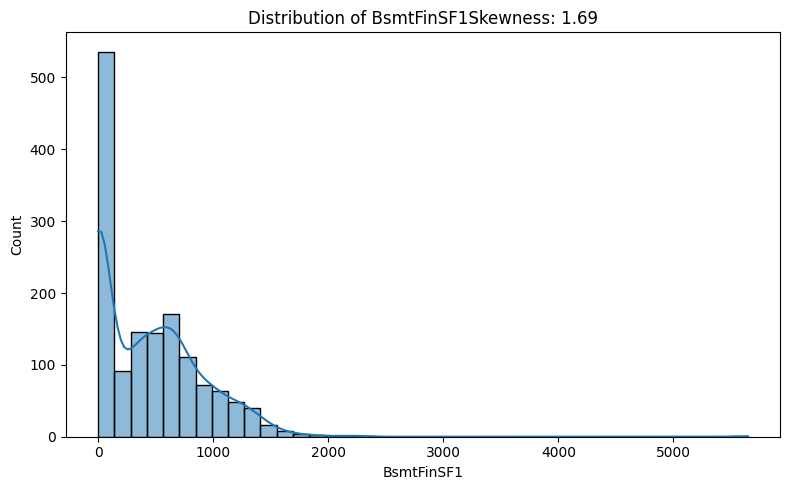

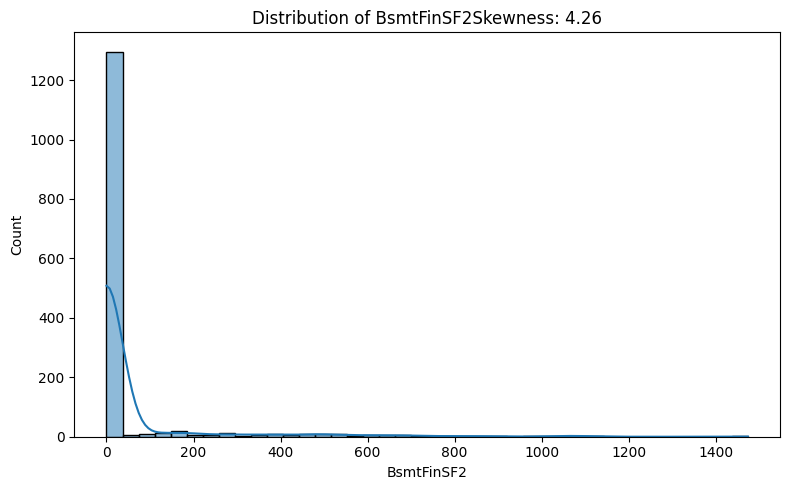

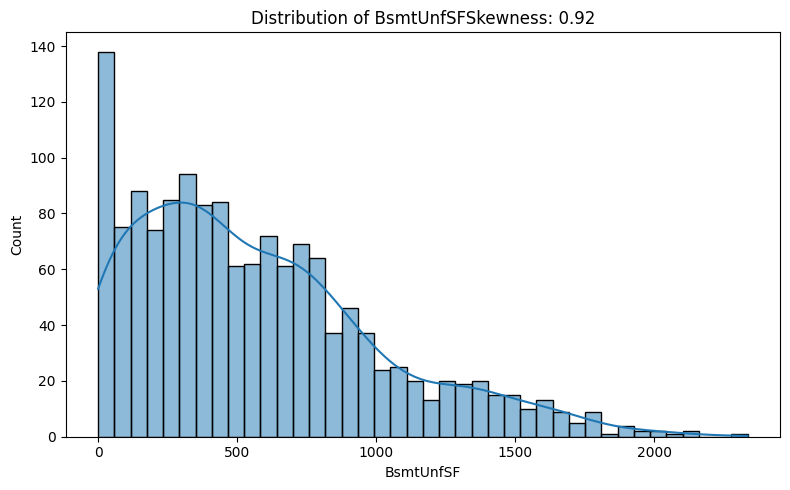

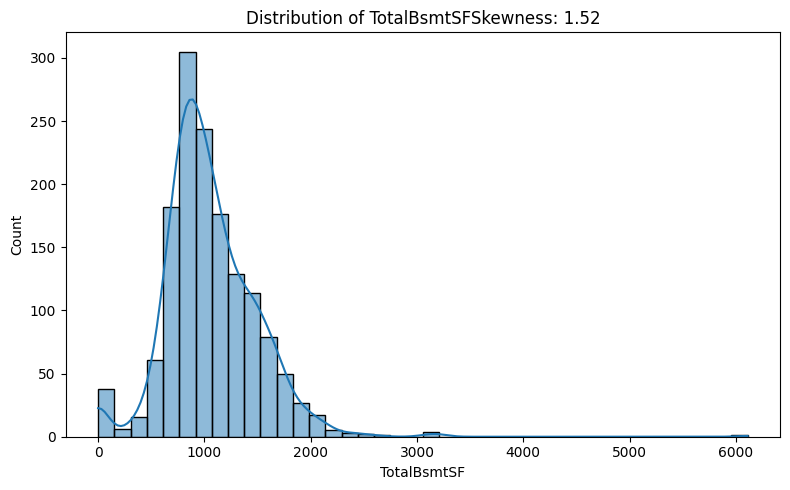

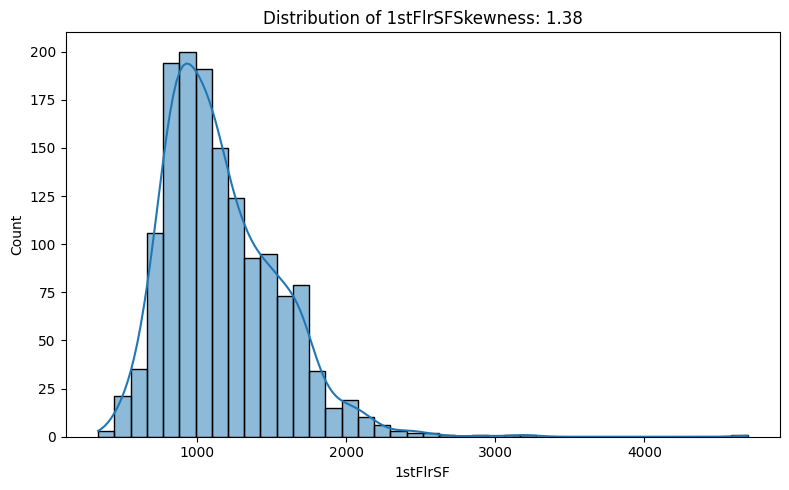

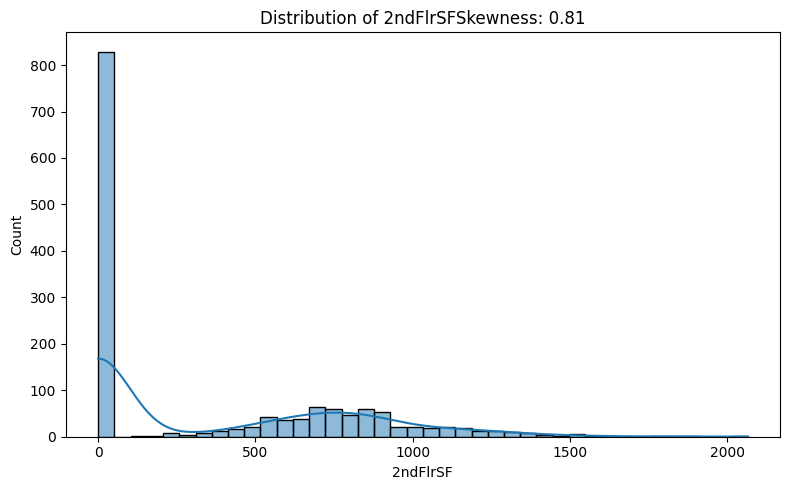

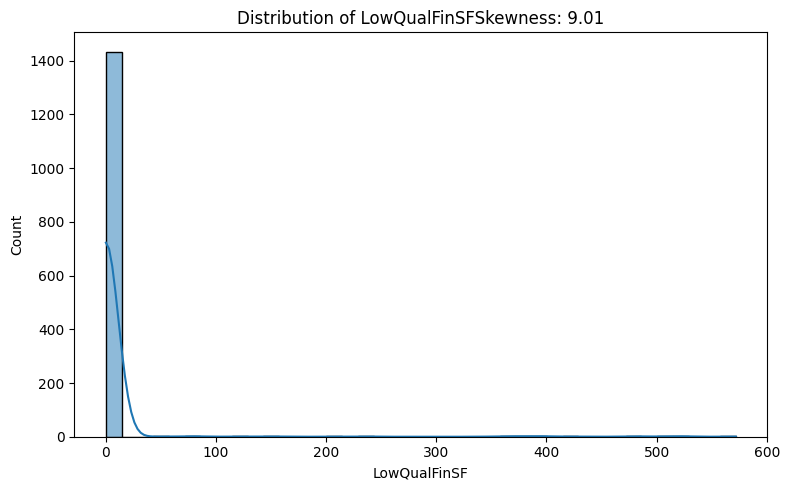

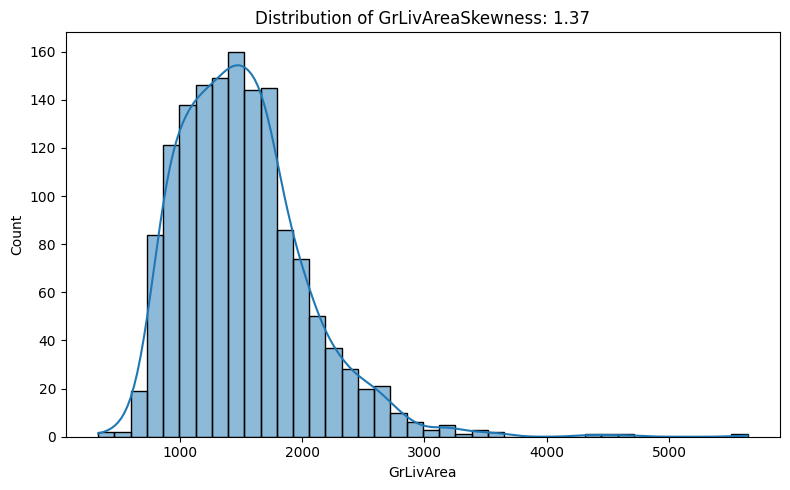

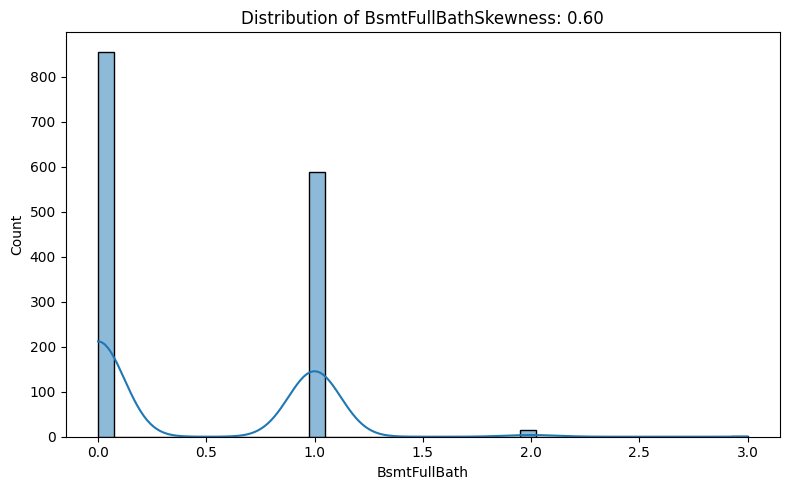

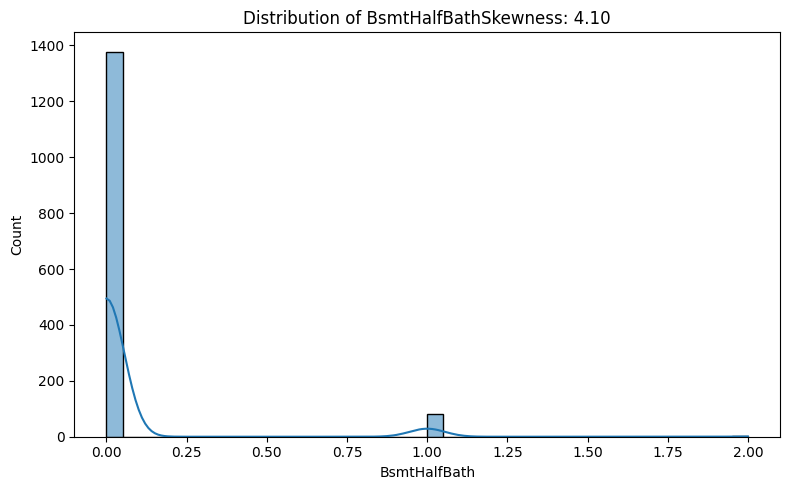

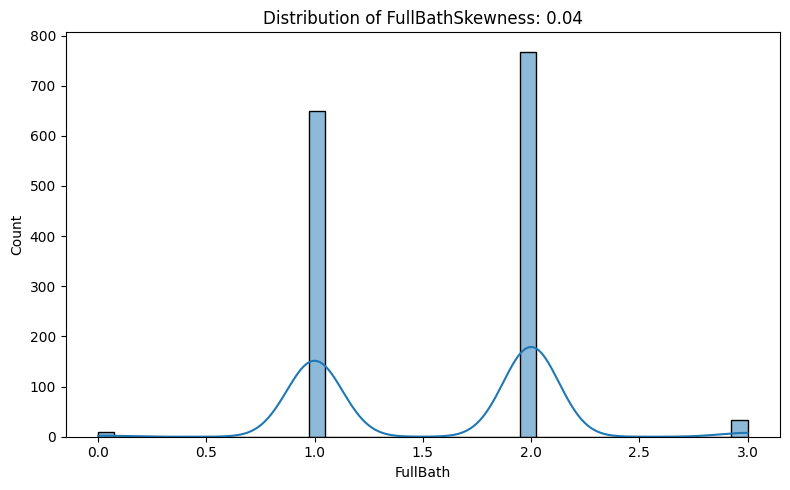

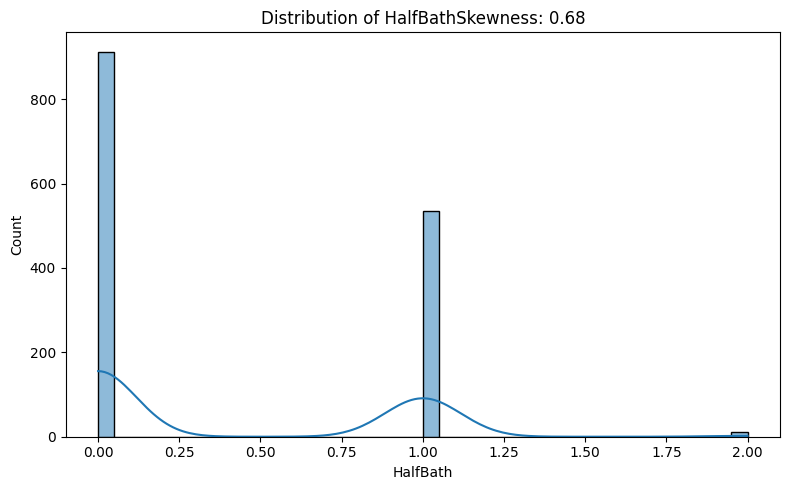

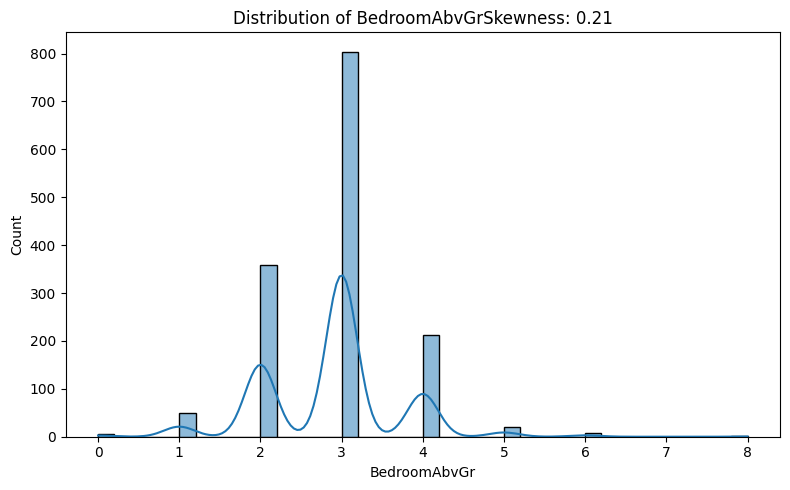

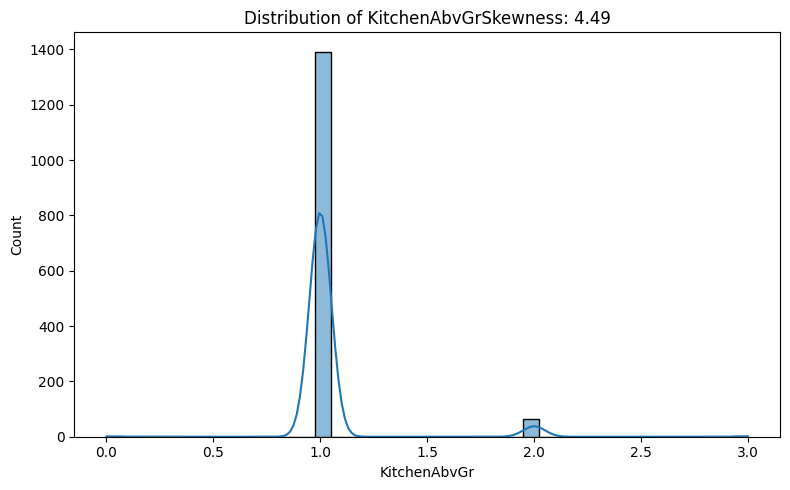

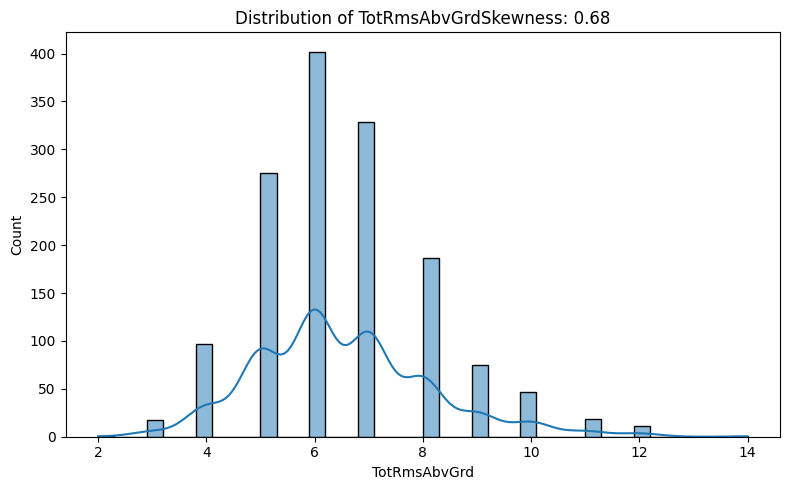

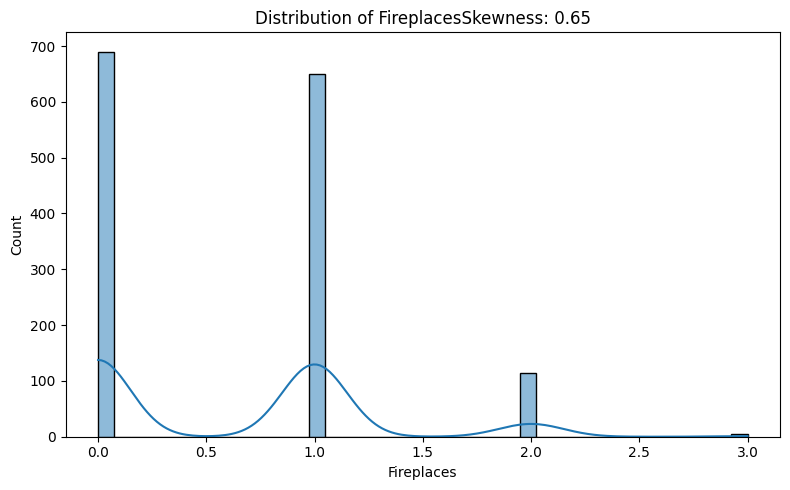

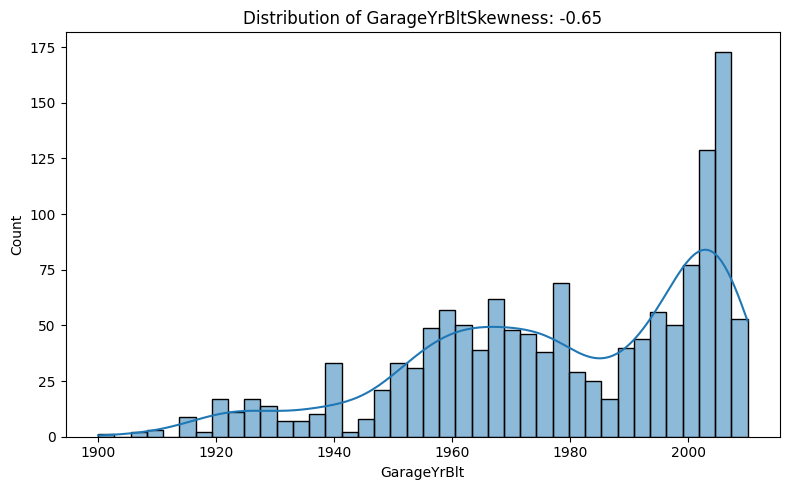

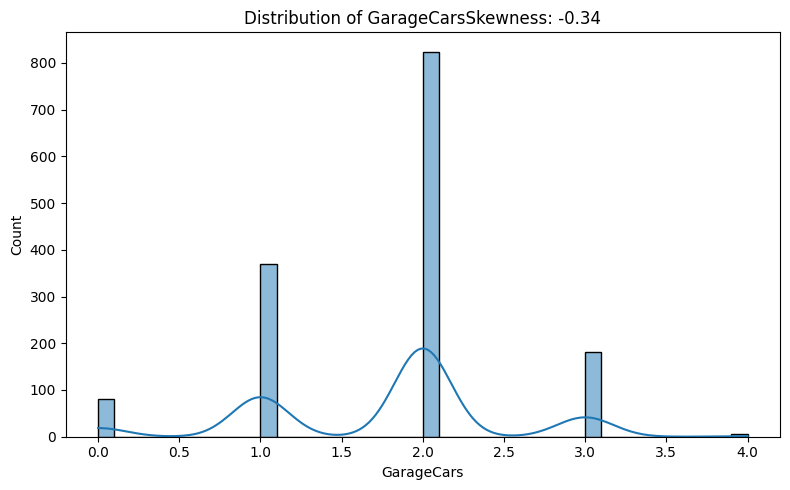

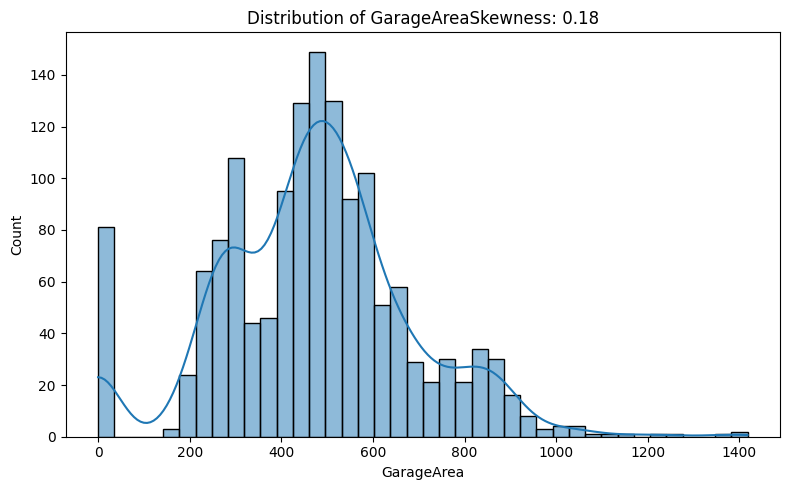

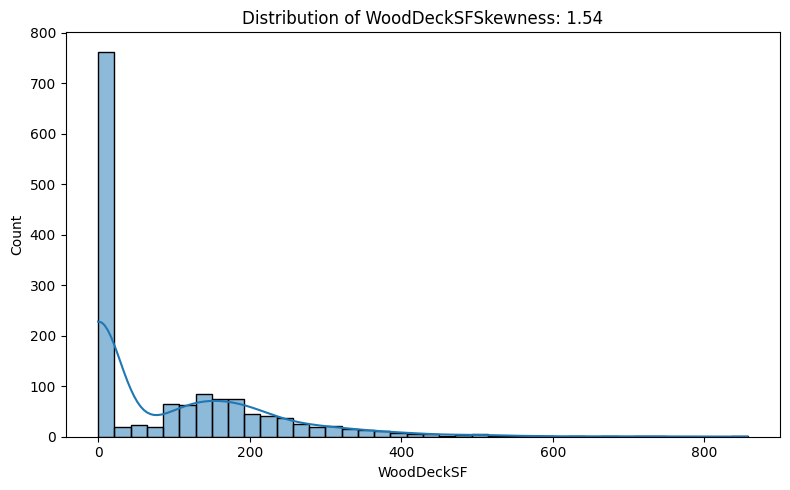

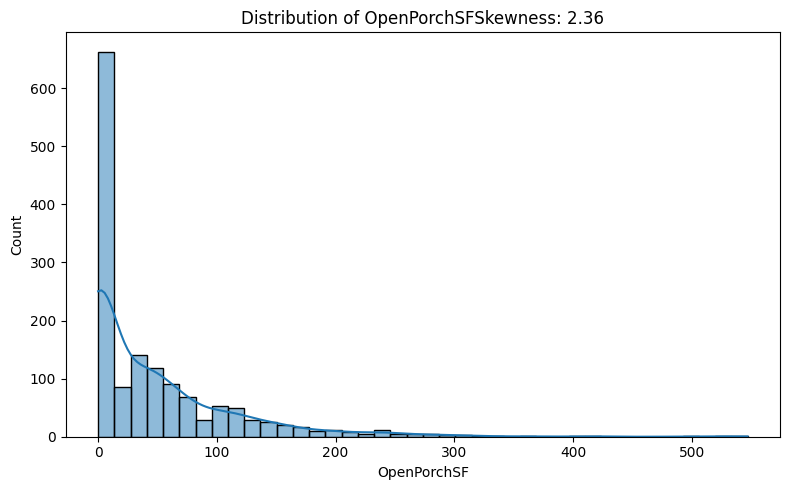

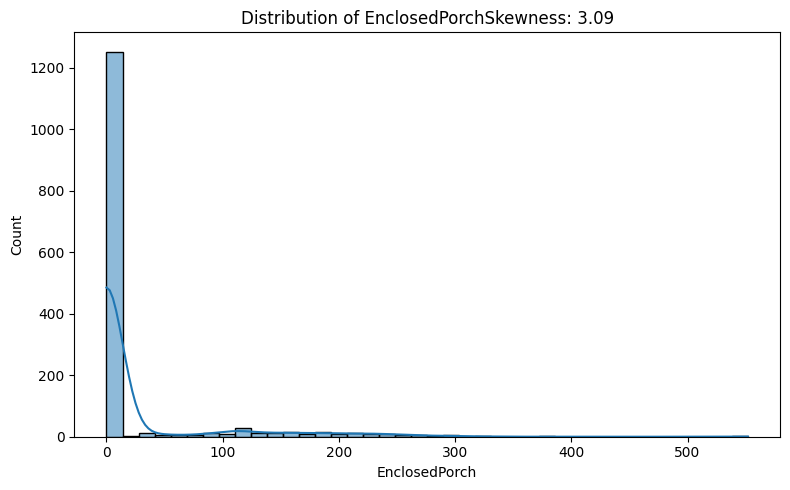

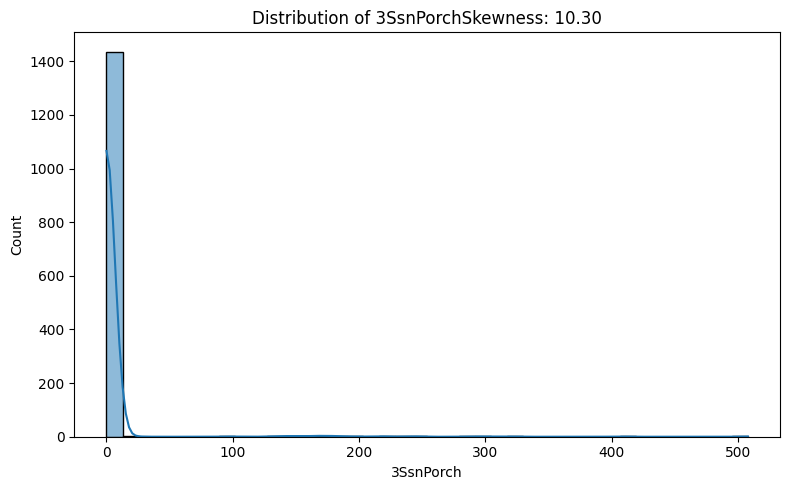

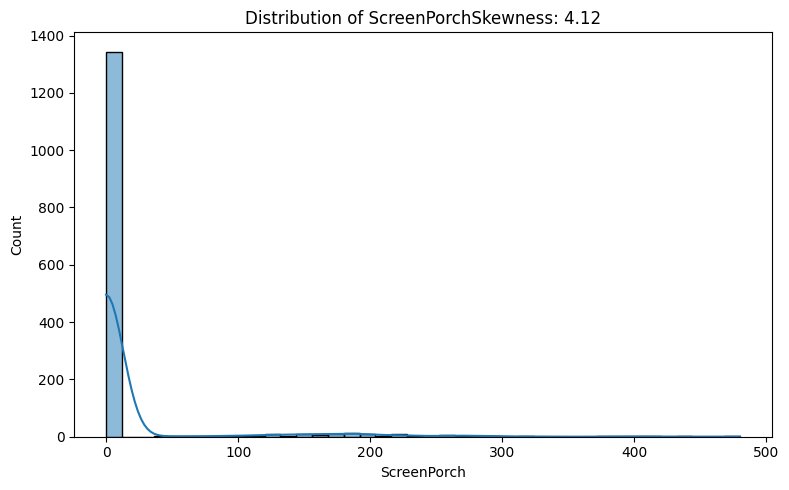

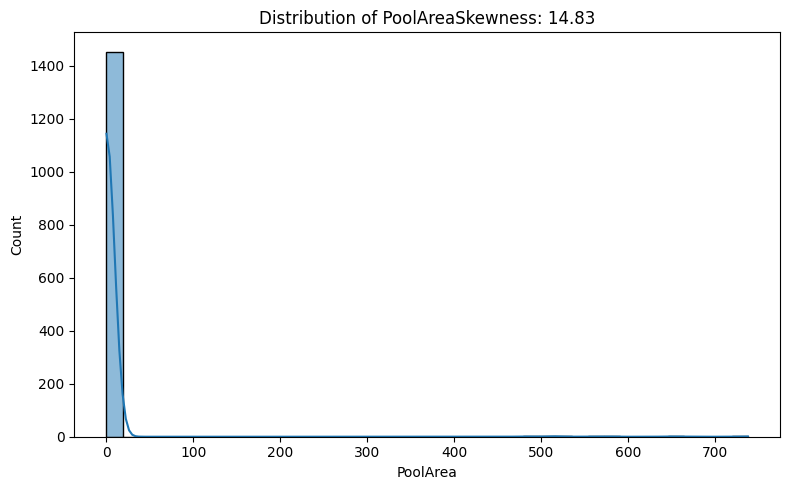

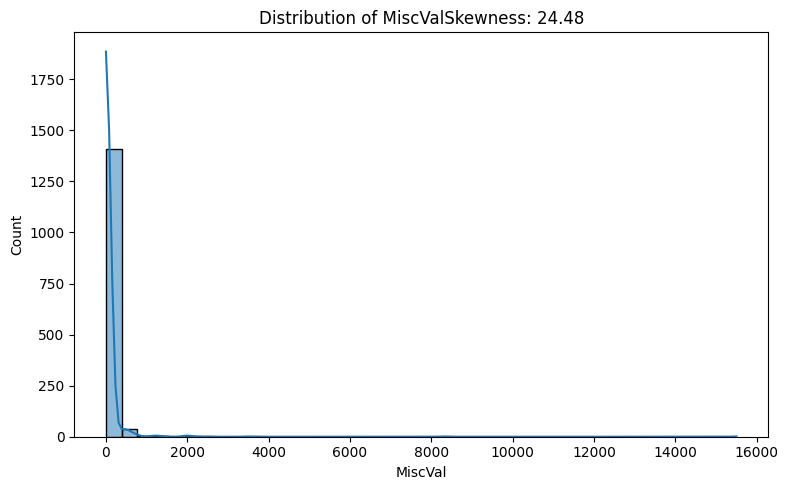

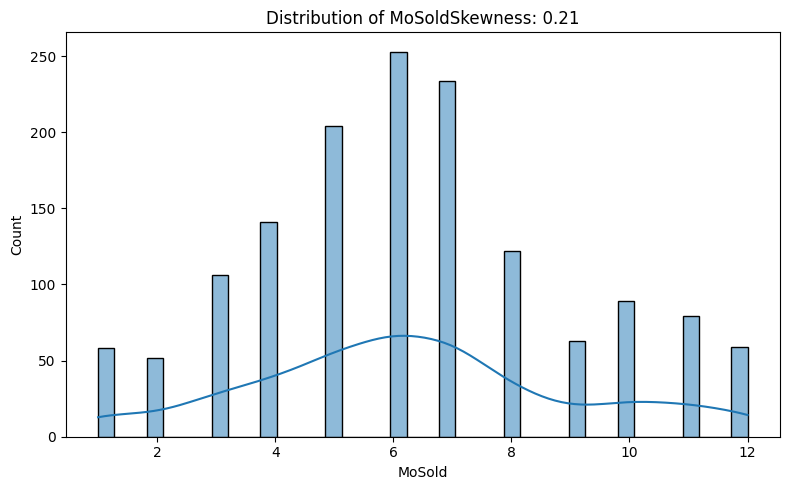

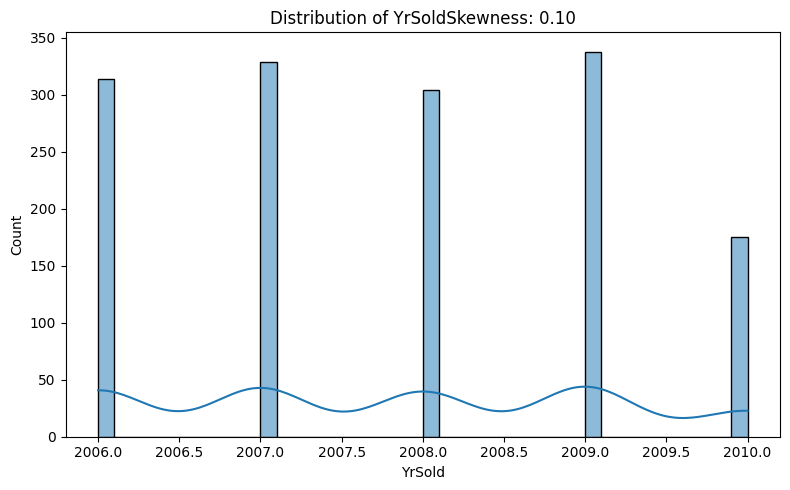

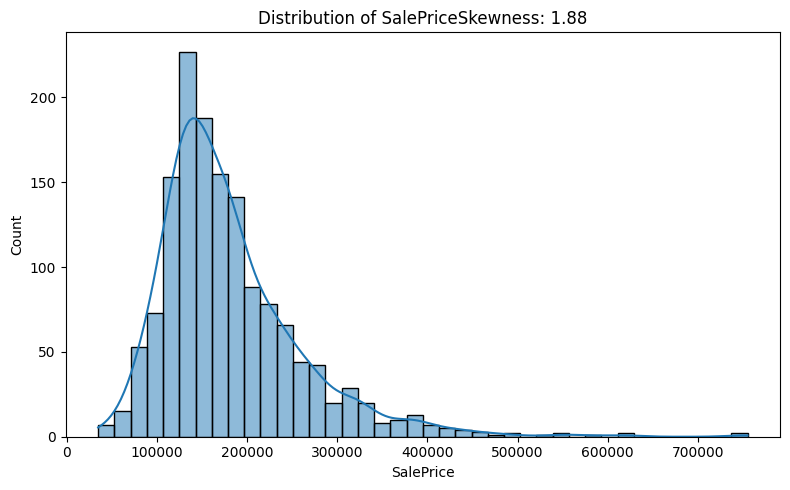

===== 建議進行轉換處理的特徵 (偏度 > 0.75) =====


,特徵,偏度
20,MiscVal,24.476794
19,PoolArea,14.828374
2,LotArea,12.207688
17,3SsnPorch,10.304342
10,LowQualFinSF,9.011341
13,KitchenAbvGr,4.488397
5,BsmtFinSF2,4.255261
18,ScreenPorch,4.122214
12,BsmtHalfBath,4.103403
16,EnclosedPorch,3.089872


In [10]:
# 數值型特徵分佈分析
print('===== 數值型特徵分佈圖與偏度分析 =====')
num_cols = train.select_dtypes(include=np.number).columns.tolist()
dist_save_dir = FIGURES_DIR / 'num_distributions'
dist_save_dir.mkdir(parents=True, exist_ok=True)
print(f'圖表將儲存至: {dist_save_dir}')

skewed_features = []
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(train[col], kde=True, bins=40)
    skewness = train[col].skew()
    plt.title(f'Distribution of {col}Skewness: {skewness:.2f}')
    plt.tight_layout()
    plt.savefig(dist_save_dir / f'{col}_distribution.png')
    plt.show()
    plt.close()
    
    if abs(skewness) > 0.75:
        skewed_features.append({'特徵': col, '偏度': skewness})

if skewed_features:
    print('===== 建議進行轉換處理的特徵 (偏度 > 0.75) =====')
    skewed_df = pd.DataFrame(skewed_features).sort_values(by='偏度', ascending=False, key=abs)
    display(skewed_df)
else:
    print('無顯著偏斜的數值特徵。')